In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv
/kaggle/input/roberta-base/rust_model.ot
/kaggle/input/roberta-base/config.json
/kaggle/input/roberta-base/merges.txt
/kaggle/input/roberta-base/README.md
/kaggle/input/roberta-base/tokenizer.json
/kaggle/input/roberta-base/vocab.json
/kaggle/input/roberta-base/tf_model.h5
/kaggle/input/roberta-base/dict.txt
/kaggle/input/roberta-base/pytorch_model.bin
/kaggle/input/roberta-base/flax_model.msgpack
/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask2.png
/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask4.jpg
/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask3.jpg
/kaggle/input/maskwordclud22/Mask-wordcloud/book-logo-1.jpg
/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask.png
/kaggle/input/maskwordclud22/Mask-wordcloud/wordcloud-man.png
/kaggle/input/maskwordclud22/Mask-wordcloud/twitter_mask3.png


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

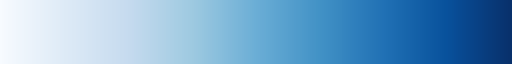

In [3]:
sns.color_palette("Blues",  as_cmap=True)
# sns.color_palette()

Available Palettes:

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 
'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 
'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

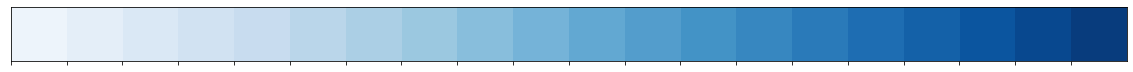

In [4]:
Blues_palette = sns.color_palette("Blues", 20)
sns.palplot(Blues_palette)

# Introduction

Using RoBERTa framework

<div>
    <h3>Evaluation Metrics: <b>Jacquard.</b></h3>
    
</div>
    
If there are two sets, A and B. **Based on jacquard similarity: ratio of intersection in union can provide similarity of two sets A and B.** It has a value **between 0 and 1**, if A==B => 1, and if disjoint sets => 0. Jacquard similarity function J is shown below

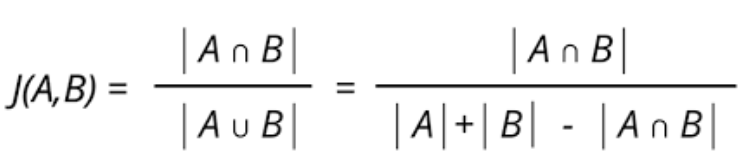

In [5]:
# example of Jacquard Similarity
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

s1 = "apple banana everyone like likey watch card holder"
s2 = "apple banana coupon passport love you"

print(jaccard(s1, s2))

0.16666666666666666


# Contents

    1. Importing Neccesary Packages

        1.1 EDA, text processing

        1.2 packages for the Bert model

    2. Load Data: text ID, text, sentiment, selected_text columns that can predict sentiment

    3. EDA: distribution of target values based on sentiment

    4. Cleaning Data

        4.1 missing values, Removed urls, emojis and punctuations, Removed stopwords etc

        4.2 data preprocessing

    5. Visualizing the Data: Tweet Lengths, Word Lengths, Word Counts, Most Common Words


    6. N-gram Analysis

        6.1 considers only few words and sequence data representation

        6.2 tune n in n-gram

    7. Wordclouds

    8. Modelling using RoBERTa

# 1. Installing Dependencies

In [6]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text processing
import string
import re

# text preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# sklearn packaces for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# word clouds and NER
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

import os
import random
import warnings
import time
import datetime
from tqdm.autonotebook import tqdm

# customizing plots
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches


# Setting options for general use
stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

# Modeling
import torch
from torch import nn
import torch.nn.functional as F 
import torch.optim as optim
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
import transformers
import tokenizers
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from tokenizers import ByteLevelBPETokenizer
from transformers import RobertaModel, RobertaConfig
from torch.utils.data import Dataset, DataLoader

from transformers import logging
logging.set_verbosity_warning()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 68.6 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011737 sha256=f0ceb44d9d9dd1dd8b4c183f0ca800a9c88e3a3c347ce690f3275d6b7b86217b
  Stored in directory: /root/.cache/pip/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.3.0
    Uninstalling en-core-web-sm-3.3.0:
      Successfully uninstalled en-core-web-sm-3.3.0


/opt/conda/lib/python3.7/site-packages/spacy/util.py:845: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.3.1,<3.4.0
  warnings.warn(warn_msg)


# 2-3. Exploratory Data Analysis

In [7]:
df_train = pd.read_csv('../input/tweet-sentiment-extraction/train.csv')
df_test = pd.read_csv('../input/tweet-sentiment-extraction/test.csv')

In [8]:
display(df_train.sample(5))
display(df_test.sample(5))

,textID,text,selected_text,sentiment
7502,3bb01e3827,Man it will be a sweep no worries,no worries,positive
20774,b734195109,WELCOME BACK see you tomorrow! come pick up ...,! come pick up your gift ;),positive
11327,8501ab8104,RAIN why must you come 'after' I flat iron my ...,RAIN why must you come 'after' I flat iron my ...,neutral
15353,c55a76ce0f,Sushi joint was closed but still had a nice l...,nice,positive
10490,a334cd4b49,"- Hey, Lenny, we are waiting you in Bulgaria ...","- Hey, Lenny, we are waiting you in Bulgaria a...",neutral


,textID,text,sentiment
2929,e2591a4f5a,It`d be nice but soon we`ll have to Pay to Tweet,neutral
3466,d8ab713a6a,my it teacher made the lamest joke today about...,positive
2382,380c3d243a,Almost ready for new Beta.... until we found a...,negative
2174,22e5e3cad2,Did it!! back in pakistan! - http://bkite.com...,neutral
532,db23b82d03,'Puke In My Mouth' the brilliant response to *...,neutral


In [9]:
df_train.shape, df_test.shape

((27481, 4), (3534, 3))

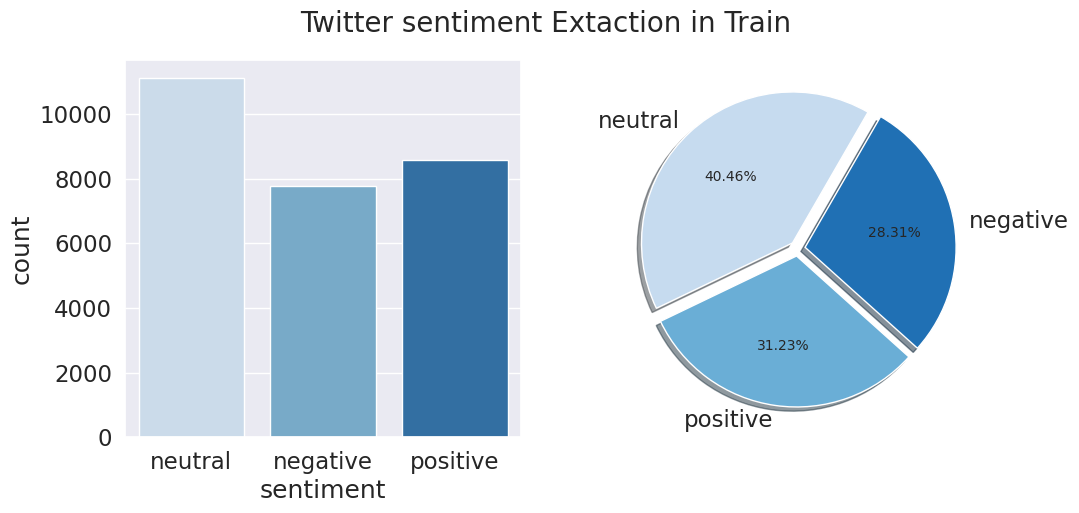

In [10]:
# Displaying target distribution
Blues_palette_3 = sns.color_palette("Blues", 3)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
sns.countplot(df_train['sentiment'],palette = Blues_palette_3, ax=axes[0])
axes[1].pie(df_train['sentiment'].value_counts(),
            labels=['neutral', 'positive', 'negative'],
            autopct='%1.2f%%',
            shadow=True,
            colors = Blues_palette_3,
            explode=(0.05, 0.05, 0.05),
            startangle=60)
fig.suptitle('Twitter sentiment Extaction in Train', fontsize=20)
plt.show()

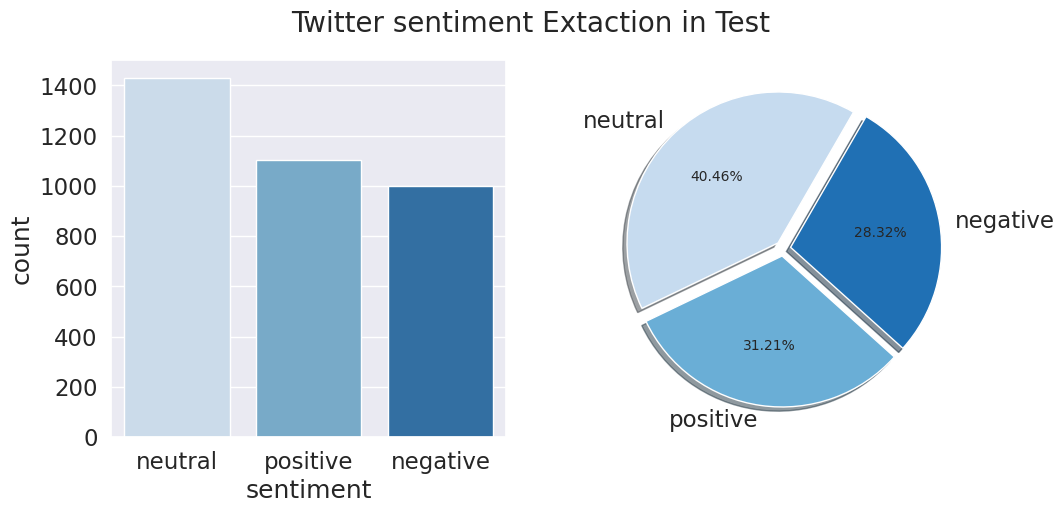

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
sns.countplot(df_test['sentiment'],palette = Blues_palette_3,ax=axes[0])
axes[1].pie(df_test['sentiment'].value_counts(),
            labels=['neutral', 'positive', 'negative'],
            autopct='%1.2f%%',
            shadow=True,
            colors = Blues_palette_3,
            explode=(0.05, 0.05, 0.05),
            startangle=60)
fig.suptitle('Twitter sentiment Extaction in Test', fontsize=20)
plt.show()

# 4. Data Cleaning

* Missing values 
* Remove urls, emojis and punctuations 
* Tokenize base text and selected_text 
* Lower case clean text 
* Remove stopwords 
* Apply part of speech tags 
* Convert part of speeches to wordnet format 
* Applying word lemmatizer 
* Convert tokenized text to string

In [12]:
# Check for missing values
df_train.isnull().value_counts()

textID  text   selected_text  sentiment
False   False  False          False        27480
        True   True           False            1
dtype: int64

In [13]:
df_test.isnull().value_counts()

textID  text   sentiment
False   False  False        3534
dtype: int64

In [14]:
# Remove missing values
df_train.dropna(inplace=True)

### Cleaning

In [15]:
# helper functions to clean text by punctuations
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

def remove_comma(readData):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
    return text

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)   

In [16]:
# Applying helper functions (train Text)
df_train['text_clean'] = df_train['text'].apply(lambda x: remove_URL(x))
df_train['text_clean'] = df_train['text_clean'].apply(lambda x: remove_punct(x))
df_train['text_clean'] = df_train['text_clean'].apply(lambda x: remove_html(x))
df_train['text_clean'] = df_train['text_clean'].apply(lambda x: remove_emoji(x))
df_train['text_clean'] = df_train['text_clean'].apply(lambda x: remove_comma(x))                     

# Applying helper functions (df_train Selected Text)
df_train['ST_clean'] = df_train['selected_text'].apply(lambda x: remove_URL(x))
df_train['ST_clean'] = df_train['ST_clean'].apply(lambda x: remove_punct(x))
df_train['ST_clean'] = df_train['ST_clean'].apply(lambda x: remove_html(x))
df_train['ST_clean'] = df_train['ST_clean'].apply(lambda x: remove_emoji(x))
df_train['ST_clean'] = df_train['ST_clean'].apply(lambda x: remove_comma(x))

# Applying helper functions (df_test)
df_test['text_clean'] = df_test['text'].apply(lambda x: remove_URL(x))
df_test['text_clean'] = df_test['text_clean'].apply(lambda x: remove_punct(x))
df_test['text_clean'] = df_test['text_clean'].apply(lambda x: remove_html(x))
df_test['text_clean'] = df_test['text_clean'].apply(lambda x: remove_emoji(x))
df_test['text_clean'] = df_test['text_clean'].apply(lambda x: remove_comma(x))   

In [17]:
df_train.sample(5)

,textID,text,selected_text,sentiment,text_clean,ST_clean
10015,3a00255dba,my twitter looks funny someone help!,my twitter looks funny someone help!,negative,my twitter looks funny someone help,my twitter looks funny someone help
12595,2559445757,back from driving and now back to bed,back from driving and now back to bed,neutral,back from driving and now back to bed,back from driving and now back to bed
460,94e82d1574,'there are people and then there are pencils'...,'there are people and then there are pencils' ...,neutral,there are people and then there are pencils s...,there are people and then there are pencils so...
13320,509d80dd4a,D`oh...forgot the ferry turns around before go...,D`oh...forgot the ferry turns around before go...,neutral,Dohforgot the ferry turns around before going ...,Dohforgot the ferry turns around before going ...
18546,43921317de,Musashi`s? Has a great rep. Or did you go to ...,Has a great rep.,positive,Musashis Has a great rep Or did you go to Kitaro,Has a great rep


In [18]:
df_test.sample(5)

,textID,text,sentiment,text_clean
1653,70932f6376,YOU LOOKED ABSOLUTELY BEAUTIFUL AND ELEGANT.,positive,YOU LOOKED ABSOLUTELY BEAUTIFUL AND ELEGANT
2134,b8d9a368ae,all ur pic it`s so nice look so cute..oh!!,positive,all ur pic its so nice look so cuteoh
893,4b2b16581a,"sorry bout the cat,",negative,sorry bout the cat
2622,15db00c707,OmG U NasTY,negative,OmG U NasTY
428,3d1184dabd,Good morning! Just went to bed it feels and a...,positive,Good morning Just went to bed it feels and al...


### Tokenizing

In [19]:
# Tokenizing tweet base texts
df_train['tokenized_text'] = df_train['text_clean'].apply(word_tokenize)
df_train['tokenized_ST'] = df_train['ST_clean'].apply(word_tokenize)

df_test['tokenized_text'] = df_test['text_clean'].apply(word_tokenize)

display(df_train.sample(5))
display(df_test.sample(5))

,textID,text,selected_text,sentiment,text_clean,ST_clean,tokenized_text,tokenized_ST
20362,b95bcbc183,"Well, at least you wont be late!","Well, at least you wont be late!",negative,Well at least you wont be late,Well at least you wont be late,"[Well, at, least, you, wont, be, late]","[Well, at, least, you, wont, be, late]"
24172,f236be785a,sad day... told my students this is my last ye...,crying,negative,sad day told my students this is my last year ...,crying,"[sad, day, told, my, students, this, is, my, l...",[crying]
20937,902670de2f,. Too bad they never made it over here during ...,Too bad th,negative,Too bad they never made it over here during t...,Too bad th,"[Too, bad, they, never, made, it, over, here, ...","[Too, bad, th]"
16865,4f0c936ea3,Awww! I was thinking about you lot up there!...,Awww! I was thinking about you lot up there! ...,positive,Awww I was thinking about you lot up there ...,Awww I was thinking about you lot up there G...,"[Awww, I, was, thinking, about, you, lot, up, ...","[Awww, I, was, thinking, about, you, lot, up, ..."
19781,5e7e087b14,I think my modem failed-having pc withdrawals..,I think my modem failed-having pc withdrawals..,negative,I think my modem failedhaving pc withdrawals,I think my modem failedhaving pc withdrawals,"[I, think, my, modem, failedhaving, pc, withdr...","[I, think, my, modem, failedhaving, pc, withdr..."


,textID,text,sentiment,text_clean,tokenized_text
3195,94977637ab,"no transport for church wont be making it, im...",negative,no transport for church wont be making it im ...,"[no, transport, for, church, wont, be, making,..."
2302,2ea6cb3bd3,Has got to go to work with a slight hangover g...,neutral,Has got to go to work with a slight hangover g...,"[Has, got, to, go, to, work, with, a, slight, ..."
2130,b13981be78,"Thanks to TweetStats, I confirmed what I long...",positive,Thanks to TweetStats I confirmed what I long ...,"[Thanks, to, TweetStats, I, confirmed, what, I..."
3460,77a7b3282b,_mommy oh well i hope she gets better,positive,mommy oh well i hope she gets better,"[mommy, oh, well, i, hope, she, gets, better]"
205,03f6b8d900,****! natalya! you gotta tell me whats going ...,negative,natalya you gotta tell me whats going on id ...,"[natalya, you, got, ta, tell, me, whats, going..."


In [20]:
# Lower casing clean text
df_train['lower_text'] = df_train['tokenized_text'].apply(lambda x: [word.lower() for word in x])

df_train['lower_ST'] = df_train['tokenized_ST'].apply(lambda x: [word.lower() for word in x])

df_test['lower_text'] = df_test['tokenized_text'].apply(lambda x: [word.lower() for word in x])

display(df_train.sample(3))
display(df_test.sample(3))

,textID,text,selected_text,sentiment,text_clean,ST_clean,tokenized_text,tokenized_ST,lower_text,lower_ST
16464,0ad2b5ee96,"Good morning nyc! If I weren`t broke, I would...","Good morning nyc! If I weren`t broke, I would ...",neutral,Good morning nyc If I werent broke I would ha...,Good morning nyc If I werent broke I would hav...,"[Good, morning, nyc, If, I, werent, broke, I, ...","[Good, morning, nyc, If, I, werent, broke, I, ...","[good, morning, nyc, if, i, werent, broke, i, ...","[good, morning, nyc, if, i, werent, broke, i, ..."
19358,5076063628,beach...yummy steak and catching up on `lost` ...,lovely,positive,beachyummy steak and catching up on lost with ...,lovely,"[beachyummy, steak, and, catching, up, on, los...",[lovely],"[beachyummy, steak, and, catching, up, on, los...",[lovely]
6399,d02b3284fd,*[ It`s time for TSCC! ],*[ It`s time for TSCC! ],neutral,Its time for TSCC,Its time for TSCC,"[Its, time, for, TSCC]","[Its, time, for, TSCC]","[its, time, for, tscc]","[its, time, for, tscc]"


,textID,text,sentiment,text_clean,tokenized_text,lower_text
2986,5a17107aba,So i have done absolutely NOTHING all day toda...,negative,So i have done absolutely NOTHING all day toda...,"[So, i, have, done, absolutely, NOTHING, all, ...","[so, i, have, done, absolutely, nothing, all, ..."
19,f7718b3c23,"I`m going into a spiritual stagnentation, its ...",neutral,Im going into a spiritual stagnentation its ex...,"[Im, going, into, a, spiritual, stagnentation,...","[im, going, into, a, spiritual, stagnentation,..."
1576,f46d274a8b,OMggg. i just heard someone is gonna die on th...,negative,OMggg i just heard someone is gonna die on the...,"[OMggg, i, just, heard, someone, is, gon, na, ...","[omggg, i, just, heard, someone, is, gon, na, ..."


### Stopwords

In [21]:
# Removing stopwords.
df_train['stopwords_removed_text'] = df_train['lower_text'].apply(lambda x: [word for word in x if word not in stop])
df_train['stopwords_removed_ST'] = df_train['lower_ST'].apply(lambda x: [word for word in x if word not in stop])

df_test['stopwords_removed_text'] = df_test['lower_text'].apply(lambda x: [word for word in x if word not in stop])

display(df_train.sample(3))
display(df_test.sample(3))

,textID,text,selected_text,sentiment,text_clean,ST_clean,tokenized_text,tokenized_ST,lower_text,lower_ST,stopwords_removed_text,stopwords_removed_ST
674,2209fb4785,That was stone cold Crazy.... ?,That was stone cold Crazy.,negative,That was stone cold Crazy,That was stone cold Crazy,"[That, was, stone, cold, Crazy]","[That, was, stone, cold, Crazy]","[that, was, stone, cold, crazy]","[that, was, stone, cold, crazy]","[stone, cold, crazy]","[stone, cold, crazy]"
8774,f97d20c990,"http://twitpic.com/61ov1 - i ahte stress, it...",! it makes me wanna cry,negative,i ahte stress its supposed to be friday it...,it makes me wanna cry,"[i, ahte, stress, its, supposed, to, be, frida...","[it, makes, me, wan, na, cry]","[i, ahte, stress, its, supposed, to, be, frida...","[it, makes, me, wan, na, cry]","[ahte, stress, supposed, friday, makes, wan, n...","[makes, wan, na, cry]"
26529,be136d7098,": Hi, i think u should try Ph? in Vietnam, it...",delicious,positive,Hi i think u should try Ph in Vietnam its re...,delicious,"[Hi, i, think, u, should, try, Ph, in, Vietnam...",[delicious],"[hi, i, think, u, should, try, ph, in, vietnam...",[delicious],"[hi, think, u, try, ph, vietnam, really, quite...",[delicious]


,textID,text,sentiment,text_clean,tokenized_text,lower_text,stopwords_removed_text
304,4a9529e753,visit si fr joemar dito bataan (frm camiguin)...,neutral,visit si fr joemar dito bataan frm camiguin ...,"[visit, si, fr, joemar, dito, bataan, frm, cam...","[visit, si, fr, joemar, dito, bataan, frm, cam...","[visit, si, fr, joemar, dito, bataan, frm, cam..."
361,37897b1693,Got people don`t let me skip sci pratical beco...,negative,Got people dont let me skip sci pratical becos...,"[Got, people, dont, let, me, skip, sci, pratic...","[got, people, dont, let, me, skip, sci, pratic...","[got, people, dont, let, skip, sci, pratical, ..."
2469,264871e342,is wanting someone to spend her summer evening...,positive,is wanting someone to spend her summer evening...,"[is, wanting, someone, to, spend, her, summer,...","[is, wanting, someone, to, spend, her, summer,...","[wanting, someone, spend, summer, evening, whi..."


### Part-of-Speech Tags

identifying and tagging the parts of the words in a sentence

output form: tuple (word, POS tag)

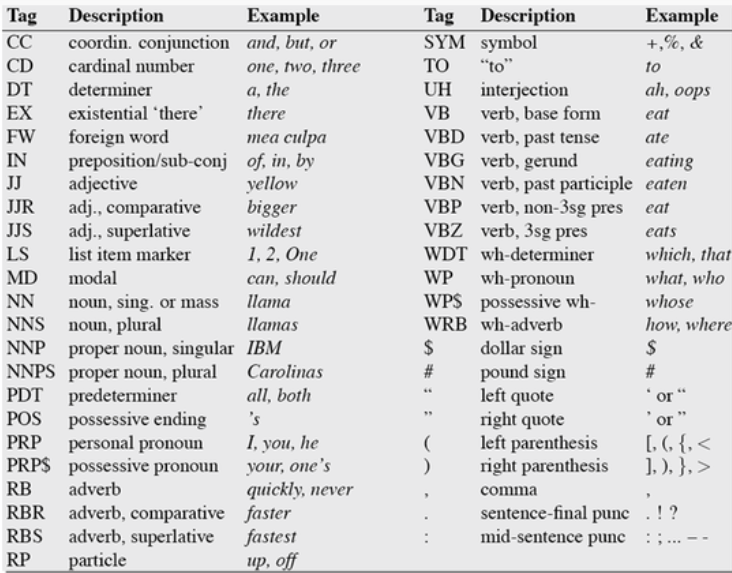

In [22]:
# Applying part of speech tags.
df_train['pos_tags_text'] = df_train['stopwords_removed_text'].apply(nltk.tag.pos_tag)
df_train['pos_tags_ST'] = df_train['stopwords_removed_ST'].apply(nltk.tag.pos_tag)

df_test['pos_tags_text'] = df_test['stopwords_removed_text'].apply(nltk.tag.pos_tag)

display(df_train.sample(3))
display(df_test.sample(3))

,textID,text,selected_text,sentiment,text_clean,ST_clean,tokenized_text,tokenized_ST,lower_text,lower_ST,stopwords_removed_text,stopwords_removed_ST,pos_tags_text,pos_tags_ST
12193,44d8af8858,i hope everything works out for you at school...,i hope,positive,i hope everything works out for you at school...,i hope,"[i, hope, everything, works, out, for, you, at...","[i, hope]","[i, hope, everything, works, out, for, you, at...","[i, hope]","[hope, everything, works, school, keep, update...",[hope],"[(hope, NN), (everything, NN), (works, VBZ), (...","[(hope, NN)]"
17207,a1ef9fbaf0,On the computer alllllllllllllllll day,On the computer alllllllllllllllll day,neutral,On the computer alllllllllllllllll day,On the computer alllllllllllllllll day,"[On, the, computer, alllllllllllllllll, day]","[On, the, computer, alllllllllllllllll, day]","[on, the, computer, alllllllllllllllll, day]","[on, the, computer, alllllllllllllllll, day]","[computer, alllllllllllllllll, day]","[computer, alllllllllllllllll, day]","[(computer, NN), (alllllllllllllllll, DT), (da...","[(computer, NN), (alllllllllllllllll, DT), (da..."
7656,0919b2fd2c,"i need to read fic again, but i lost it","i need to read fic again, but i lost it",neutral,i need to read fic again but i lost it,i need to read fic again but i lost it,"[i, need, to, read, fic, again, but, i, lost, it]","[i, need, to, read, fic, again, but, i, lost, it]","[i, need, to, read, fic, again, but, i, lost, it]","[i, need, to, read, fic, again, but, i, lost, it]","[need, read, fic, lost]","[need, read, fic, lost]","[(need, NN), (read, VB), (fic, NN), (lost, VBN)]","[(need, NN), (read, VB), (fic, NN), (lost, VBN)]"


,textID,text,sentiment,text_clean,tokenized_text,lower_text,stopwords_removed_text,pos_tags_text
230,6cd35dd82e,I do my humble best Going on a works paintba...,positive,I do my humble best Going on a works paintba...,"[I, do, my, humble, best, Going, on, a, works,...","[i, do, my, humble, best, going, on, a, works,...","[humble, best, going, works, paintball, day, s...","[(humble, JJ), (best, JJS), (going, VBG), (wor..."
1431,cf1a0bb3c2,"Nope, kicked that habit more then a year ago",neutral,Nope kicked that habit more then a year ago,"[Nope, kicked, that, habit, more, then, a, yea...","[nope, kicked, that, habit, more, then, a, yea...","[nope, kicked, habit, year, ago]","[(nope, NN), (kicked, VBD), (habit, JJ), (year..."
3355,32cde6dbc5,in school w. linda doing nothing ;i miss you,negative,in school w linda doing nothing i miss you,"[in, school, w, linda, doing, nothing, i, miss...","[in, school, w, linda, doing, nothing, i, miss...","[school, w, linda, nothing, miss]","[(school, NN), (w, NN), (linda, NN), (nothing,..."


### Changing to Wordnet Format

ontology about English words in the past, outlines how they relate to each other rather than organizing individual meanings by word like a dictionary.
organizing them around relationship b/w words increases utilization.

In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [24]:
# Converting part of speeches to wordnet format
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN

In [25]:
df_train['wordnet_pos_text'] = df_train['pos_tags_text'].apply( 
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df_train['wordnet_pos_ST'] = df_train['pos_tags_ST'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df_test['wordnet_pos_text'] = df_test['pos_tags_text'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

display(df_train.sample(3))
display(df_test.sample(3))

,textID,text,selected_text,sentiment,text_clean,ST_clean,tokenized_text,tokenized_ST,lower_text,lower_ST,stopwords_removed_text,stopwords_removed_ST,pos_tags_text,pos_tags_ST,wordnet_pos_text,wordnet_pos_ST
17833,eb78ba16d5,so you should. You`re a fantastic actor it`s ...,. You`re a fantastic actor,positive,so you should Youre a fantastic actor its abo...,Youre a fantastic actor,"[so, you, should, Youre, a, fantastic, actor, ...","[Youre, a, fantastic, actor]","[so, you, should, youre, a, fantastic, actor, ...","[youre, a, fantastic, actor]","[youre, fantastic, actor, time, got, recognition]","[youre, fantastic, actor]","[(youre, NN), (fantastic, JJ), (actor, NN), (t...","[(youre, NN), (fantastic, JJ), (actor, NN)]","[(youre, n), (fantastic, a), (actor, n), (time...","[(youre, n), (fantastic, a), (actor, n)]"
11457,82c8e1b4f9,"Hmmm, should have looked at it a little more ...","Hmmm, should have looked at it a little more m...",neutral,Hmmm should have looked at it a little more m...,Hmmm should have looked at it a little more me...,"[Hmmm, should, have, looked, at, it, a, little...","[Hmmm, should, have, looked, at, it, a, little...","[hmmm, should, have, looked, at, it, a, little...","[hmmm, should, have, looked, at, it, a, little...","[hmmm, looked, little, methinks]","[hmmm, looked, little, methinks]","[(hmmm, NN), (looked, VBD), (little, JJ), (met...","[(hmmm, NN), (looked, VBD), (little, JJ), (met...","[(hmmm, n), (looked, v), (little, a), (methink...","[(hmmm, n), (looked, v), (little, a), (methink..."
24554,ca94a8dbd4,today was such a horrible dayy,such a horrible dayy,negative,today was such a horrible dayy,such a horrible dayy,"[today, was, such, a, horrible, dayy]","[such, a, horrible, dayy]","[today, was, such, a, horrible, dayy]","[such, a, horrible, dayy]","[today, horrible, dayy]","[horrible, dayy]","[(today, NN), (horrible, JJ), (dayy, NN)]","[(horrible, JJ), (dayy, NN)]","[(today, n), (horrible, a), (dayy, n)]","[(horrible, a), (dayy, n)]"


,textID,text,sentiment,text_clean,tokenized_text,lower_text,stopwords_removed_text,pos_tags_text,wordnet_pos_text
2670,f3e83b7d22,I am thinking about reading that too! She is ...,neutral,I am thinking about reading that too She is t...,"[I, am, thinking, about, reading, that, too, S...","[i, am, thinking, about, reading, that, too, s...","[thinking, reading, talking, view, miss, often]","[(thinking, VBG), (reading, VBG), (talking, VB...","[(thinking, v), (reading, v), (talking, v), (v..."
3392,4626b8b37a,my shoes hurt my feet,negative,my shoes hurt my feet,"[my, shoes, hurt, my, feet]","[my, shoes, hurt, my, feet]","[shoes, hurt, feet]","[(shoes, NNS), (hurt, VBD), (feet, NNS)]","[(shoes, n), (hurt, v), (feet, n)]"
3307,d26c5024c9,It would be that Dover race that they played o...,neutral,It would be that Dover race that they played o...,"[It, would, be, that, Dover, race, that, they,...","[it, would, be, that, dover, race, that, they,...","[would, dover, race, played, classic]","[(would, MD), (dover, VB), (race, NN), (played...","[(would, n), (dover, v), (race, n), (played, v..."


### Stemming and Lemmatization

Stemming sometimes creates words that dont exist, and Lemmatizing sometimes creates words that do exist.

Stemming and Lemmatizing are root extractions, which can be extracted from the dictionary, and Lemma can be extracted from the dictionary.
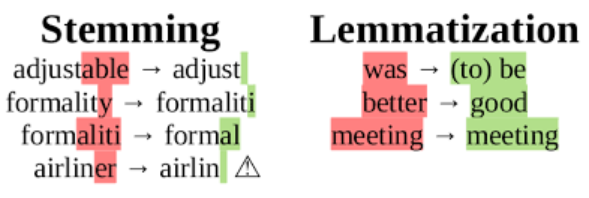

In [26]:
# Applying word lemmatizer
wnl = WordNetLemmatizer()

df_train['lemmatized_text'] = df_train['wordnet_pos_text'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df_train['lemmatized_text'] = df_train['lemmatized_text'].apply(
    lambda x: [word for word in x if word not in stop])

df_train['lemma_str_text'] = [' '.join(map(str, l)) for l in df_train['lemmatized_text']]

df_train['lemmatized_ST'] = df_train['wordnet_pos_ST'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df_train['lemmatized_ST'] = df_train['lemmatized_ST'].apply(
    lambda x: [word for word in x if word not in stop])

df_train['lemmatized_str_ST'] = [' '.join(map(str, l)) for l in df_train['lemmatized_ST']]

df_test['lemmatized_text'] = df_test['wordnet_pos_text'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df_test['lemmatized_text'] = df_test['lemmatized_text'].apply(
    lambda x: [word for word in x if word not in stop])

df_test['lemma_str_text'] = [' '.join(map(str, l)) for l in df_test['lemmatized_text']]

display(df_train.sample(3))
display(df_test.sample(3))

,textID,text,selected_text,sentiment,text_clean,ST_clean,tokenized_text,tokenized_ST,lower_text,lower_ST,stopwords_removed_text,stopwords_removed_ST,pos_tags_text,pos_tags_ST,wordnet_pos_text,wordnet_pos_ST,lemmatized_text,lemma_str_text,lemmatized_ST,lemmatized_str_ST
8656,6b2afa7423,Lmao i know !! pleaseeee reply You got any r...,Lmao i know !! pleaseeee reply You got any re...,neutral,Lmao i know pleaseeee reply You got any rep...,Lmao i know pleaseeee reply You got any repl...,"[Lmao, i, know, pleaseeee, reply, You, got, an...","[Lmao, i, know, pleaseeee, reply, You, got, an...","[lmao, i, know, pleaseeee, reply, you, got, an...","[lmao, i, know, pleaseeee, reply, you, got, an...","[lmao, know, pleaseeee, reply, got, replies, y...","[lmao, know, pleaseeee, reply, got, replies, yet]","[(lmao, NN), (know, VBP), (pleaseeee, NN), (re...","[(lmao, NN), (know, VBP), (pleaseeee, NN), (re...","[(lmao, n), (know, v), (pleaseeee, n), (reply,...","[(lmao, n), (know, v), (pleaseeee, n), (reply,...","[lmao, know, pleaseeee, reply, get, reply, yet...",lmao know pleaseeee reply get reply yet l x,"[lmao, know, pleaseeee, reply, get, reply, yet]",lmao know pleaseeee reply get reply yet
1220,9d6a07033b,My throat is on fire,My throat is on fire,neutral,My throat is on fire,My throat is on fire,"[My, throat, is, on, fire]","[My, throat, is, on, fire]","[my, throat, is, on, fire]","[my, throat, is, on, fire]","[throat, fire]","[throat, fire]","[(throat, NN), (fire, NN)]","[(throat, NN), (fire, NN)]","[(throat, n), (fire, n)]","[(throat, n), (fire, n)]","[throat, fire]",throat fire,"[throat, fire]",throat fire
26700,ed25e31700,Very early and I am actually just going back ...,Very early and I am actually just going back f...,neutral,Very early and I am actually just going back ...,Very early and I am actually just going back f...,"[Very, early, and, I, am, actually, just, goin...","[Very, early, and, I, am, actually, just, goin...","[very, early, and, i, am, actually, just, goin...","[very, early, and, i, am, actually, just, goin...","[early, actually, going, back, little, rest, t...","[early, actually, going, back, little, rest, t...","[(early, RB), (actually, RB), (going, VBG), (b...","[(early, RB), (actually, RB), (going, VBG), (b...","[(early, r), (actually, r), (going, v), (back,...","[(early, r), (actually, r), (going, v), (back,...","[early, actually, go, back, little, rest, talk...",early actually go back little rest talk little...,"[early, actually, go, back, little, rest, talk...",early actually go back little rest talk little...


,textID,text,sentiment,text_clean,tokenized_text,lower_text,stopwords_removed_text,pos_tags_text,wordnet_pos_text,lemmatized_text,lemma_str_text
274,b6d2229b03,I`d love to but I think the trek from London ...,neutral,Id love to but I think the trek from London w...,"[Id, love, to, but, I, think, the, trek, from,...","[id, love, to, but, i, think, the, trek, from,...","[id, love, think, trek, london, would, bit, much]","[(id, JJ), (love, NN), (think, VBP), (trek, IN...","[(id, a), (love, n), (think, v), (trek, n), (l...","[id, love, think, trek, london, would, bite, m...",id love think trek london would bite much
3135,e33459f8f1,Just left Brooklyn going uptown for some latin...,neutral,Just left Brooklyn going uptown for some latin...,"[Just, left, Brooklyn, going, uptown, for, som...","[just, left, brooklyn, going, uptown, for, som...","[left, brooklyn, going, uptown, latin, coffee,...","[(left, VBN), (brooklyn, RP), (going, VBG), (u...","[(left, v), (brooklyn, r), (going, v), (uptown...","[leave, brooklyn, go, uptown, latin, coffee, d...",leave brooklyn go uptown latin coffee dollar s...
2453,47617218fe,Hooray!,positive,Hooray,[Hooray],[hooray],[hooray],"[(hooray, NN)]","[(hooray, n)]",[hooray],hooray


# 5. Data Visualization

## Tweet Length

In [27]:
# Creating a new feature for the visualization.
# text_clean Lengths visualization.
df_train['Character Count'] = df_train['text_clean'].apply(lambda x: len(str(x)))

def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[:2, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#008d62')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot
    ax2 = fig.add_subplot(grid[2:, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#008d62')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(y=feature, data=df, ax=ax3, color='#008d62')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=20))

    plt.suptitle(f'{title}', fontsize=24)

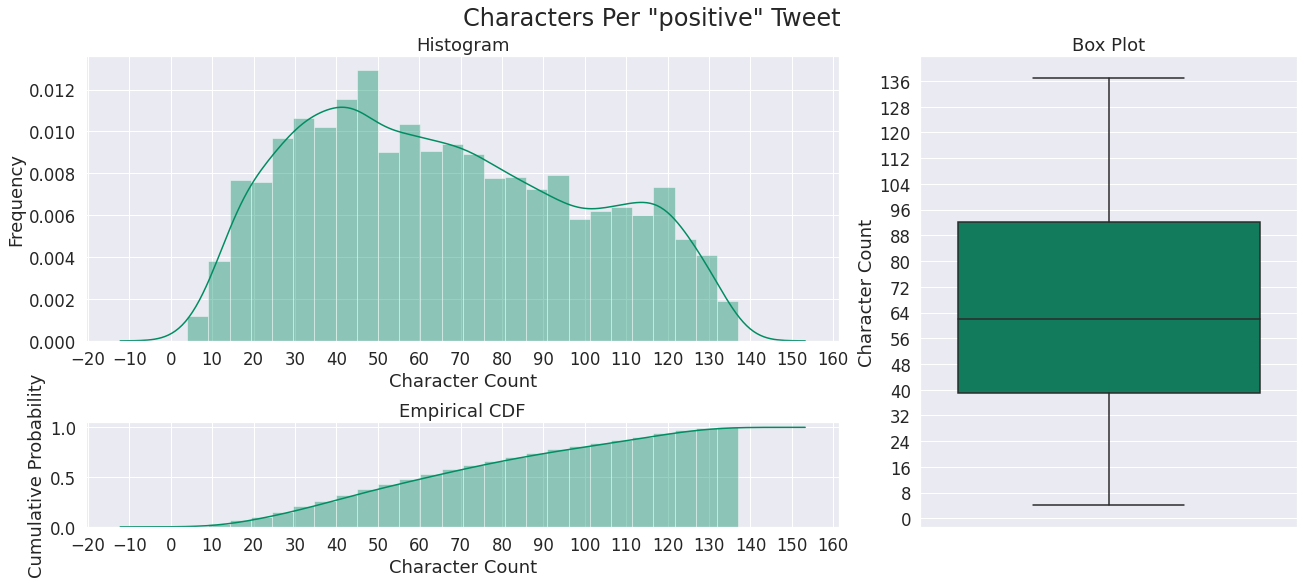

In [28]:
plot_dist3(df_train[df_train['sentiment'] == 'positive'], 'Character Count', 'Characters Per "positive" Tweet')

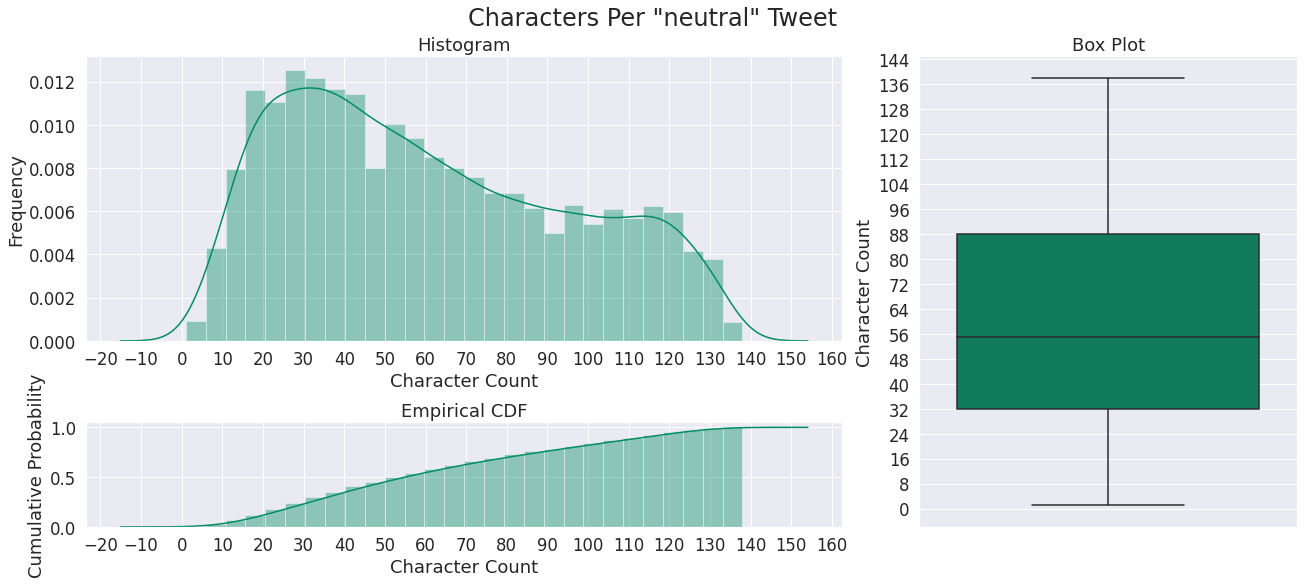

In [29]:
plot_dist3(df_train[df_train['sentiment'] == 'neutral'], 'Character Count', 'Characters Per "neutral" Tweet')

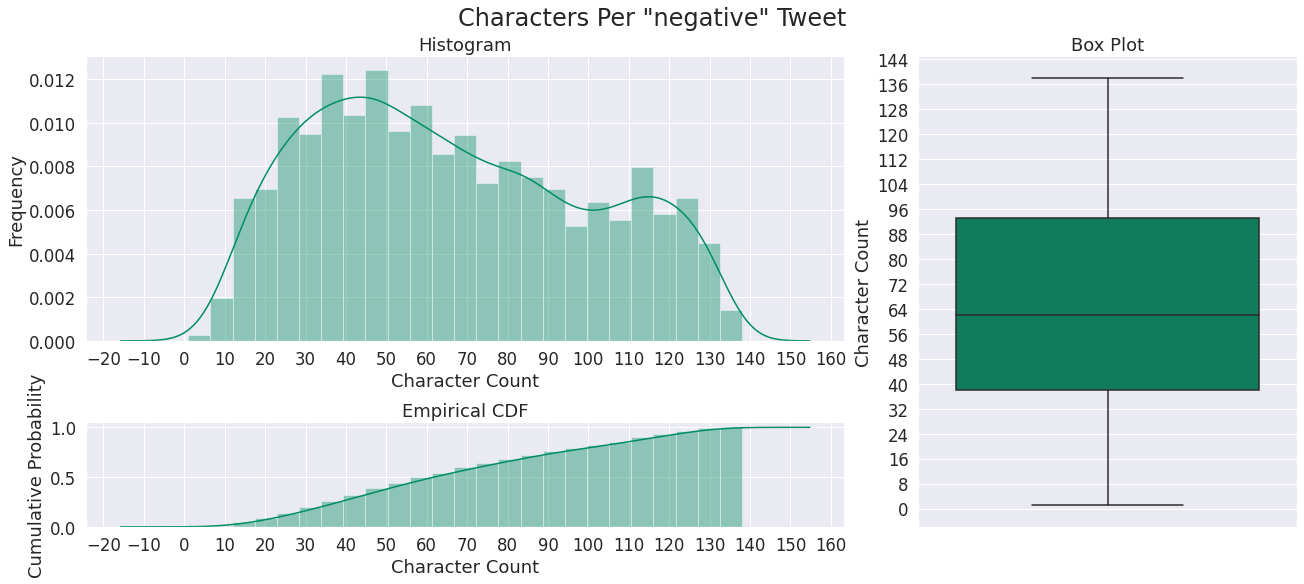

In [30]:
plot_dist3(df_train[df_train['sentiment'] == 'negative'], 'Character Count','Characters Per "negative" Tweet')

In [31]:
# ST_clean Lengths visualization.
df_train['Character Count ST'] = df_train['ST_clean'].apply(lambda x: len(str(x)))

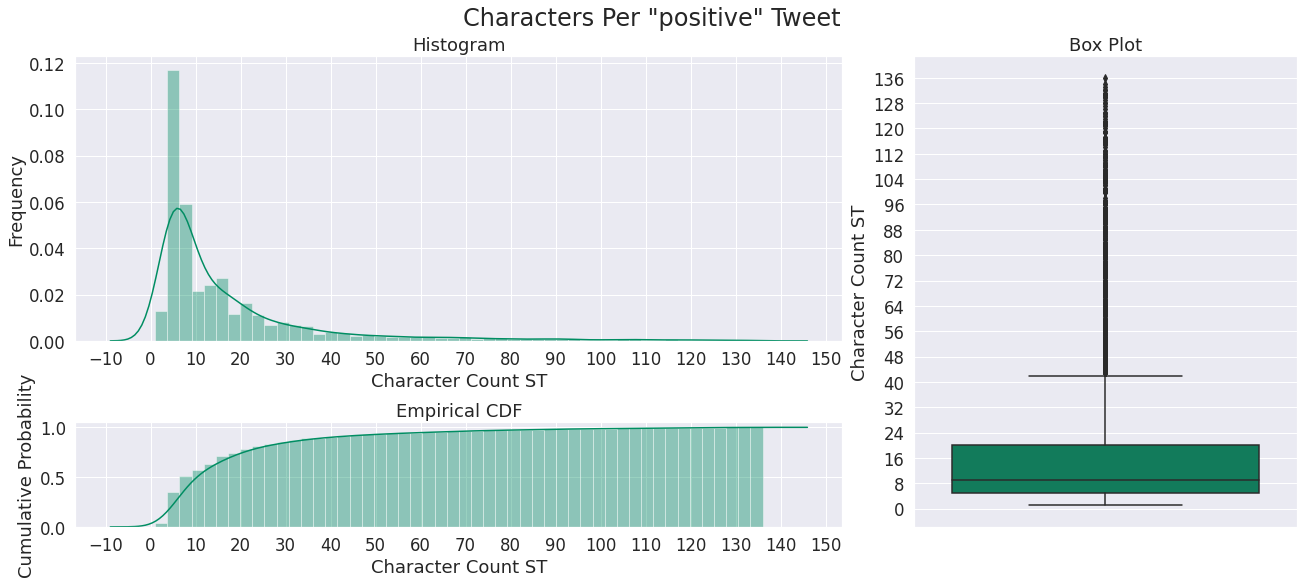

In [32]:
plot_dist3(df_train[df_train['sentiment'] == 'positive'], 'Character Count ST','Characters Per "positive" Tweet')

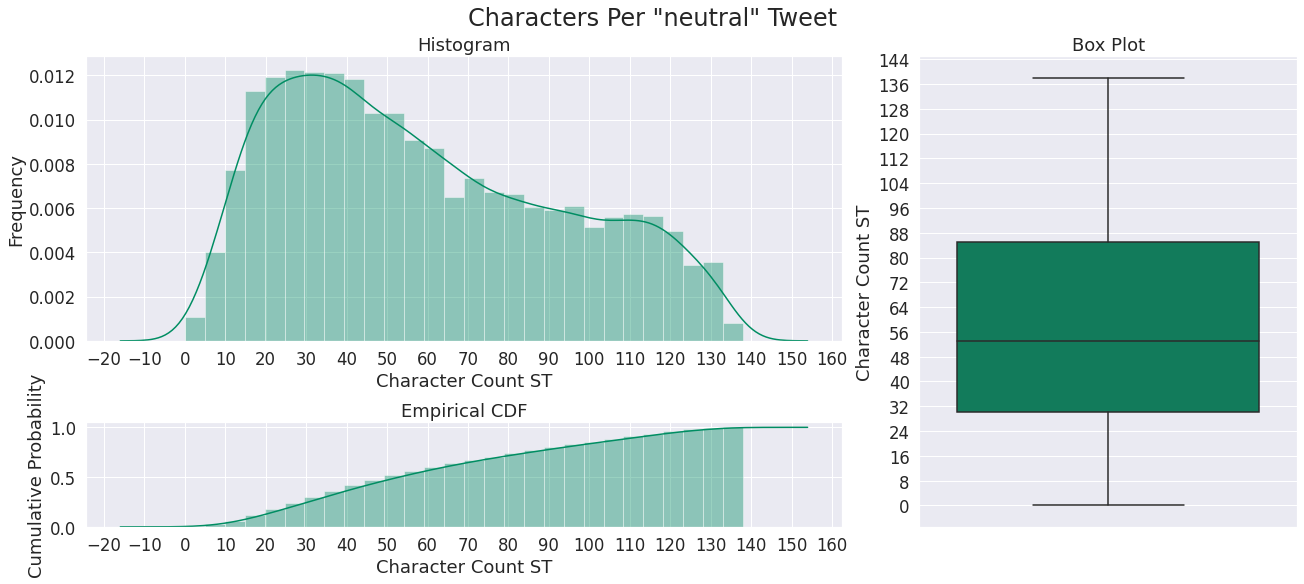

In [33]:
plot_dist3(df_train[df_train['sentiment'] == 'neutral'], 'Character Count ST','Characters Per "neutral" Tweet')

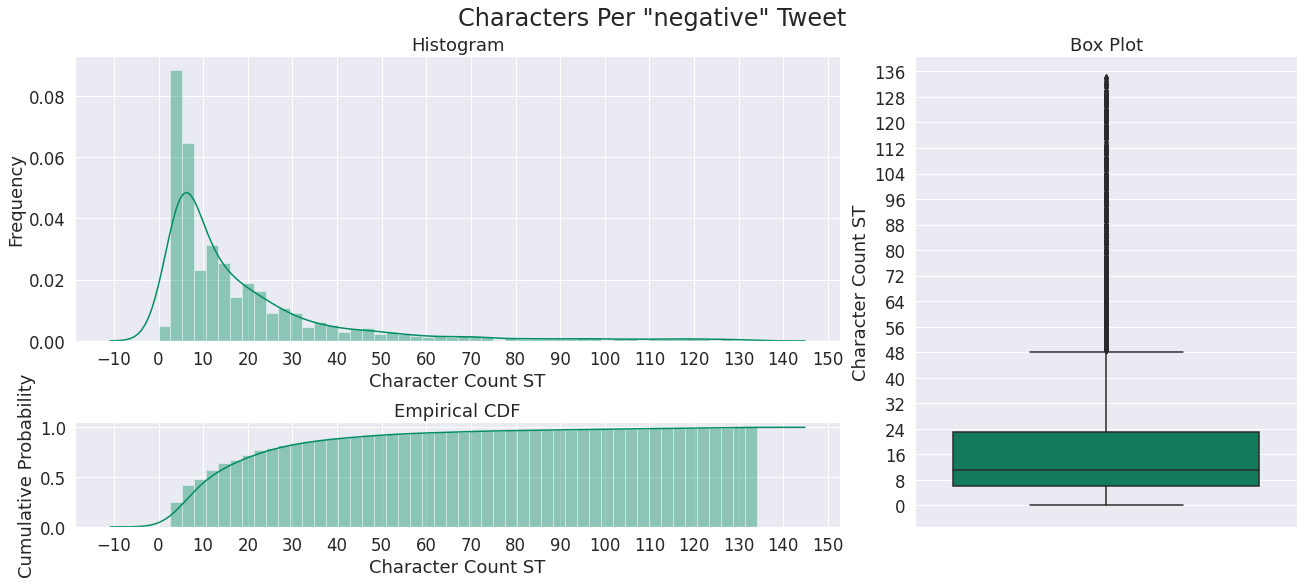

In [34]:
plot_dist3(df_train[df_train['sentiment'] == 'negative'], 'Character Count ST','Characters Per "negative" Tweet')

In [35]:
# Test data : text_clean Lengths visualization.
df_test['Character Count'] = df_test['text_clean'].apply(lambda x: len(str(x)))

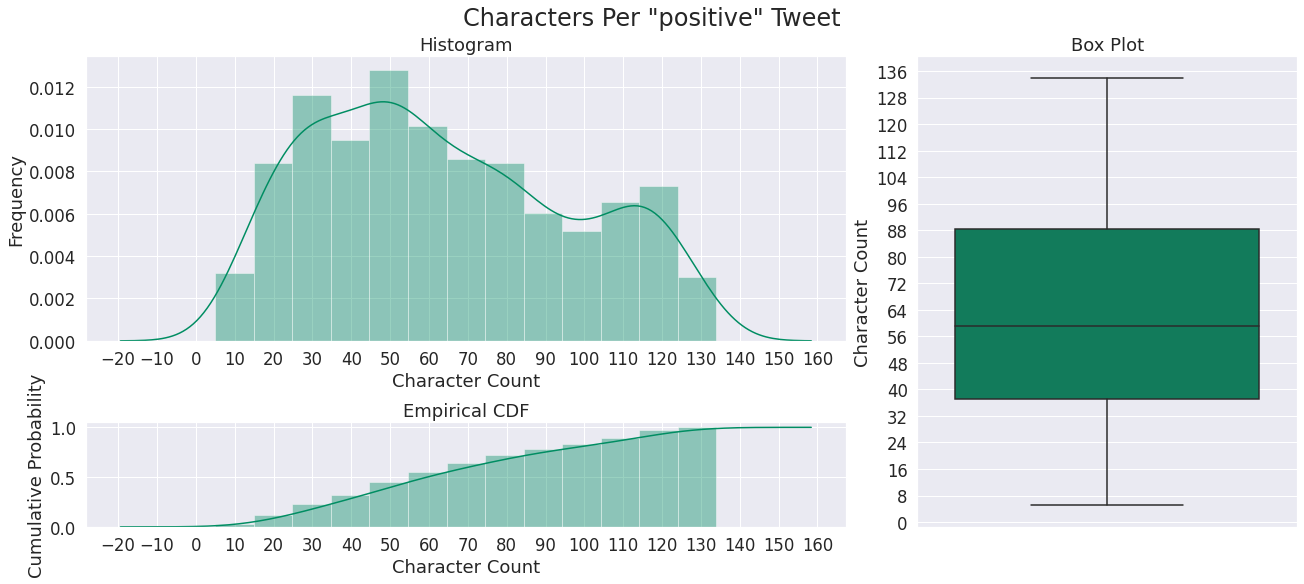

In [36]:
plot_dist3(df_test[df_test['sentiment'] == 'positive'], 'Character Count','Characters Per "positive" Tweet')

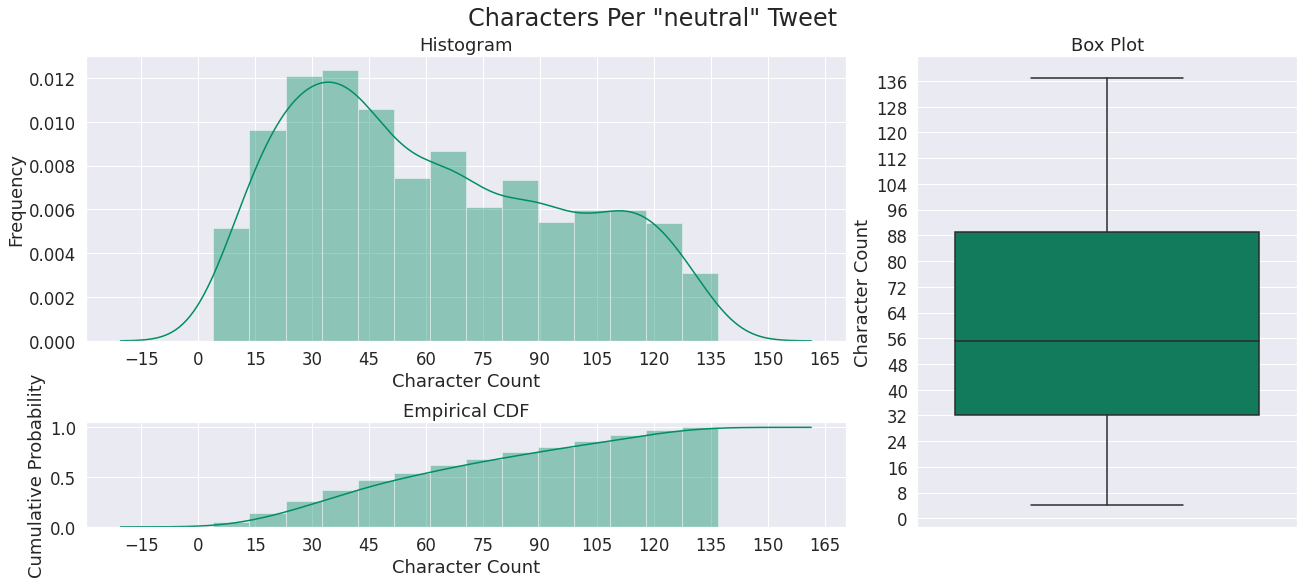

In [37]:
plot_dist3(df_test[df_test['sentiment'] == 'neutral'], 'Character Count','Characters Per "neutral" Tweet')

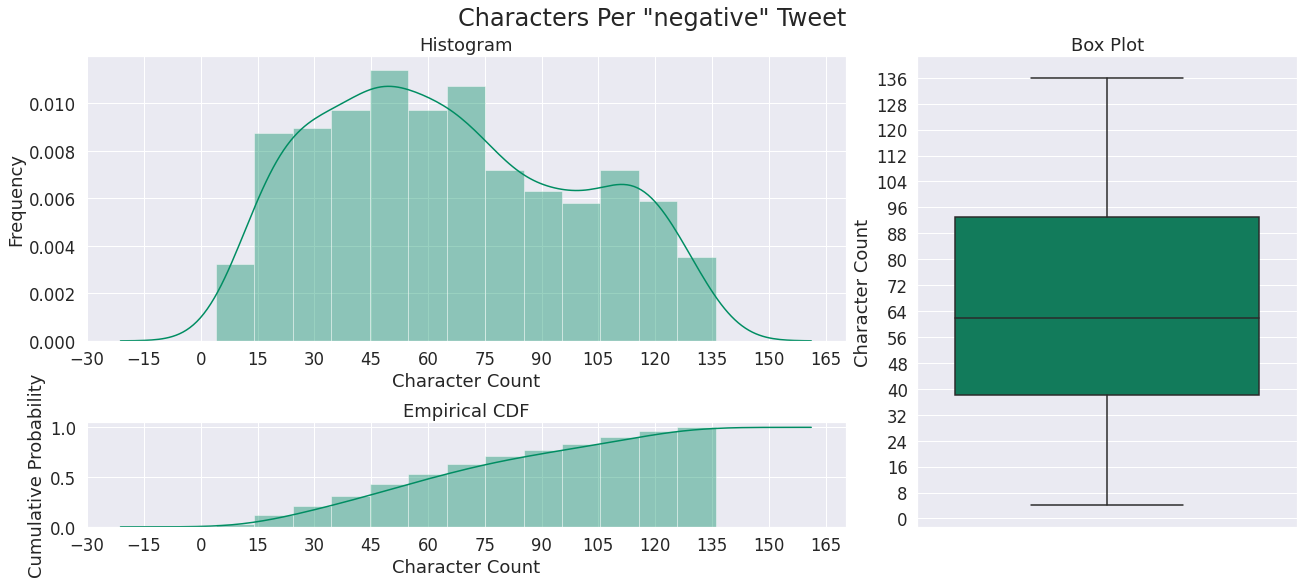

In [38]:
plot_dist3(df_test[df_test['sentiment'] == 'negative'], 'Character Count','Characters Per "negative" Tweet')

## Word Counts

In [39]:
# comparing word counts
def plot_word_number_histogram(textne, textpo, textng):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textne.str.split().map(lambda x: len(x)), ax=axes[0], color='#008d62')
    sns.distplot(textpo.str.split().map(lambda x: len(x)), ax=axes[1], color='#008d62')
    sns.distplot(textng.str.split().map(lambda x: len(x)), ax=axes[2], color='#008d62')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('neutral')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('positive')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('negative')
    
    fig.suptitle('Punctuations in tweets', fontsize=24, va='baseline')
    
    fig.tight_layout()

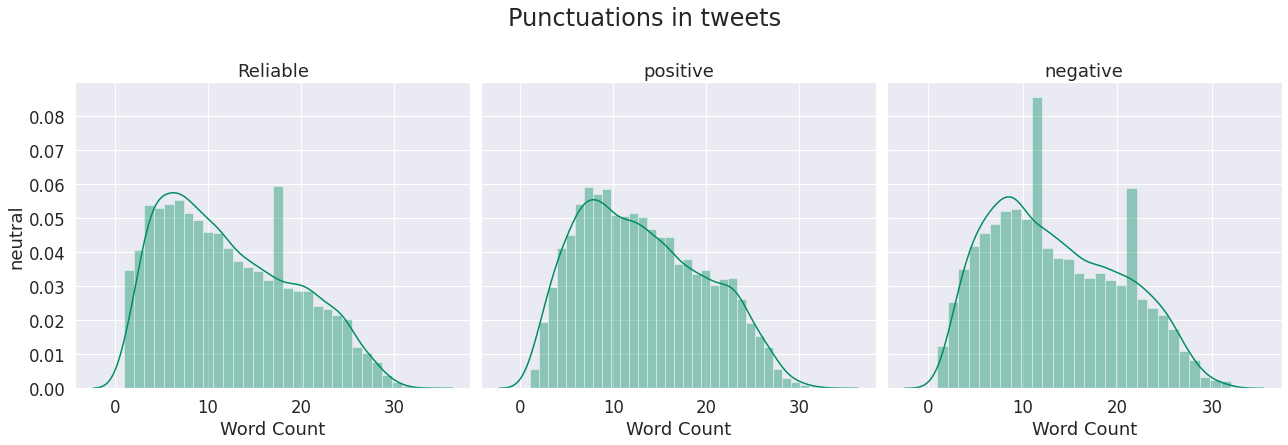

In [40]:
plot_word_number_histogram(df_train[df_train['sentiment'] == 'neutral']['text'],
                           df_train[df_train['sentiment'] == 'positive']['text'],
                           df_train[df_train['sentiment'] == 'negative']['text'])

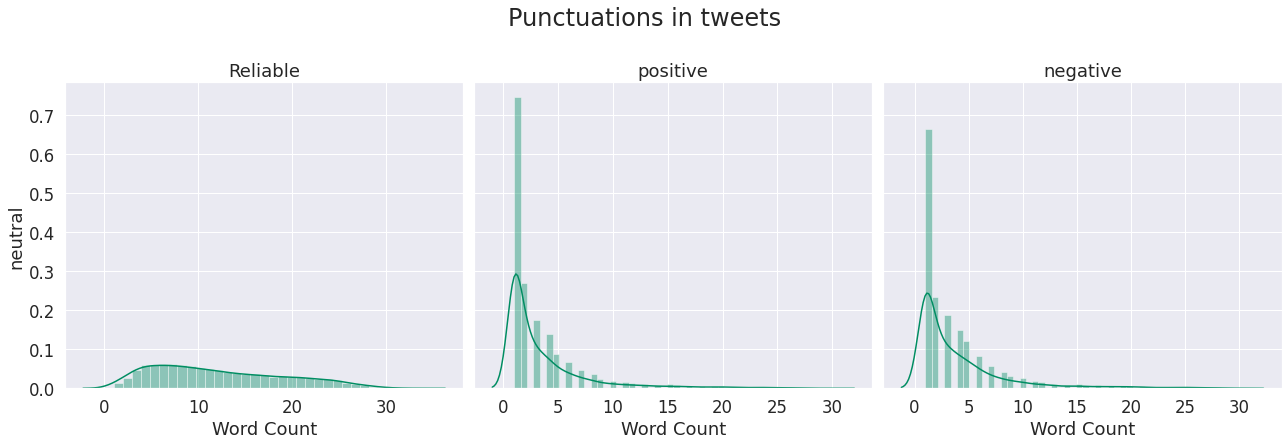

In [41]:
plot_word_number_histogram(df_train[df_train['sentiment'] == 'neutral']['selected_text'],
                           df_train[df_train['sentiment'] == 'positive']['selected_text'],
                           df_train[df_train['sentiment'] == 'negative']['selected_text'])

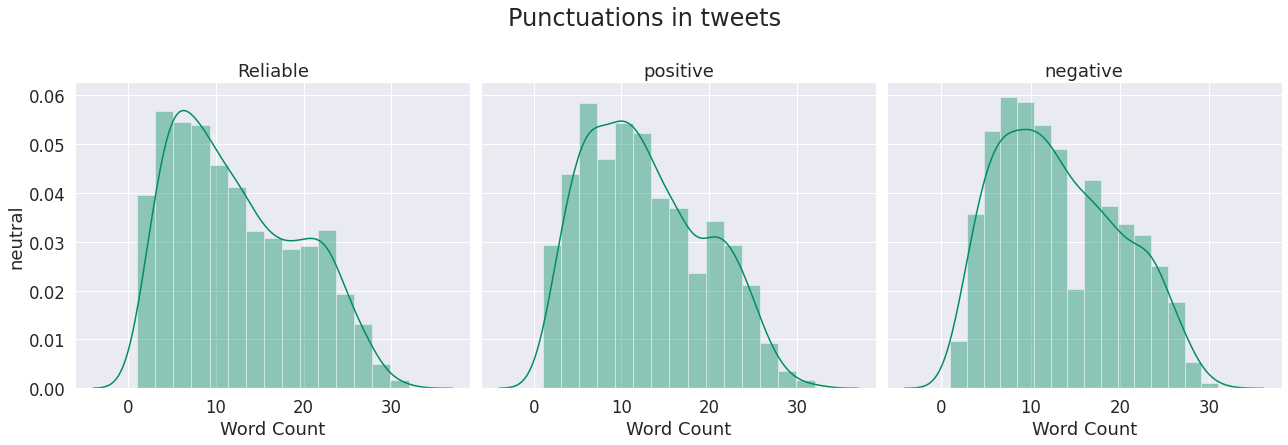

In [42]:
plot_word_number_histogram(df_test[df_test['sentiment'] == 'neutral']['text'],
                           df_test[df_test['sentiment'] == 'positive']['text'],
                           df_test[df_test['sentiment'] == 'negative']['text'])

## Word Lengths

In [43]:
# comparing average word length
def plot_word_len_histogram(textne, textpo, textng):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textne.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#008d62')
    sns.distplot(textpo.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#008d62')
    sns.distplot(textng.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[2], color='#008d62')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('neutral')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('positive')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('negative')
    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

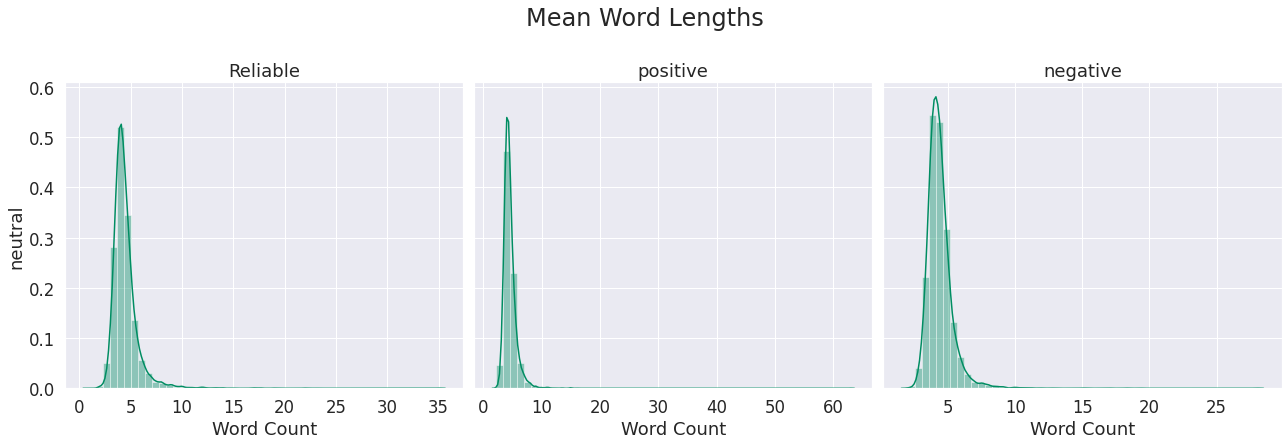

In [44]:
plot_word_len_histogram(df_train[df_train['sentiment'] == 'neutral']['text'],
                        df_train[df_train['sentiment'] == 'positive']['text'],
                        df_train[df_train['sentiment'] == 'negative']['text'])

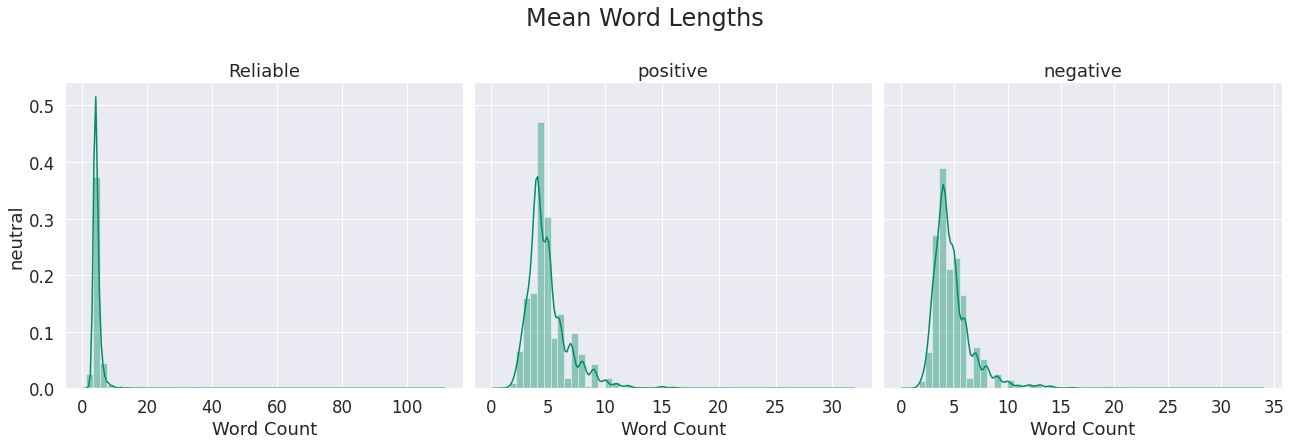

In [45]:
plot_word_len_histogram(df_train[df_train['sentiment'] == 'neutral']['selected_text'],
                        df_train[df_train['sentiment'] == 'positive']['selected_text'],
                        df_train[df_train['sentiment'] == 'negative']['selected_text'])

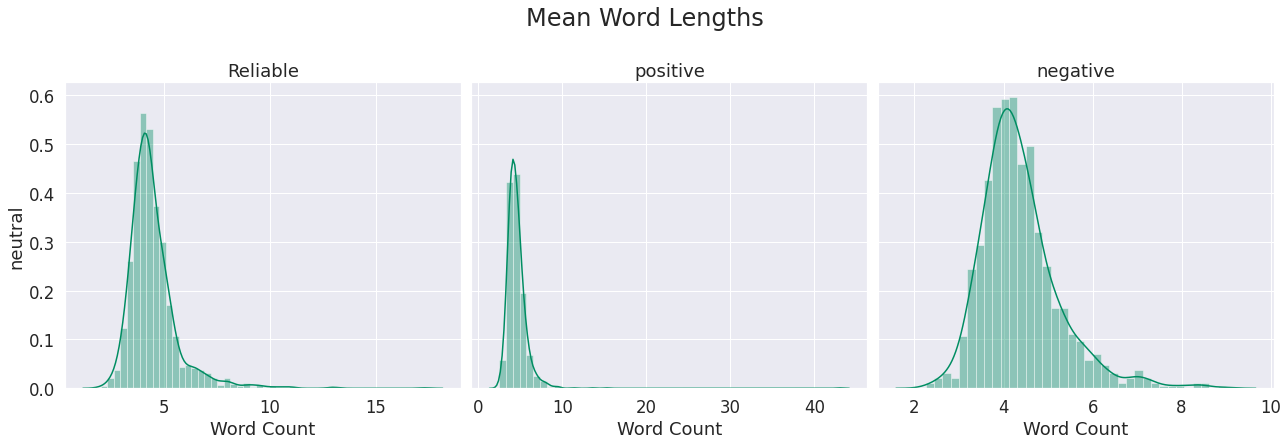

In [46]:
plot_word_len_histogram(df_test[df_test['sentiment'] == 'neutral']['text'],
                        df_test[df_test['sentiment'] == 'positive']['text'],
                        df_test[df_test['sentiment'] == 'negative']['text'])

In [47]:
lis = [
    df_train[df_train['sentiment'] == 'neutral']['lemma_str_text'],
    df_train[df_train['sentiment'] == 'positive']['lemma_str_text'],
    df_train[df_train['sentiment'] == 'negative']['lemma_str_text']
]

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


# 6. N-gram Analysis

## Most Common Words

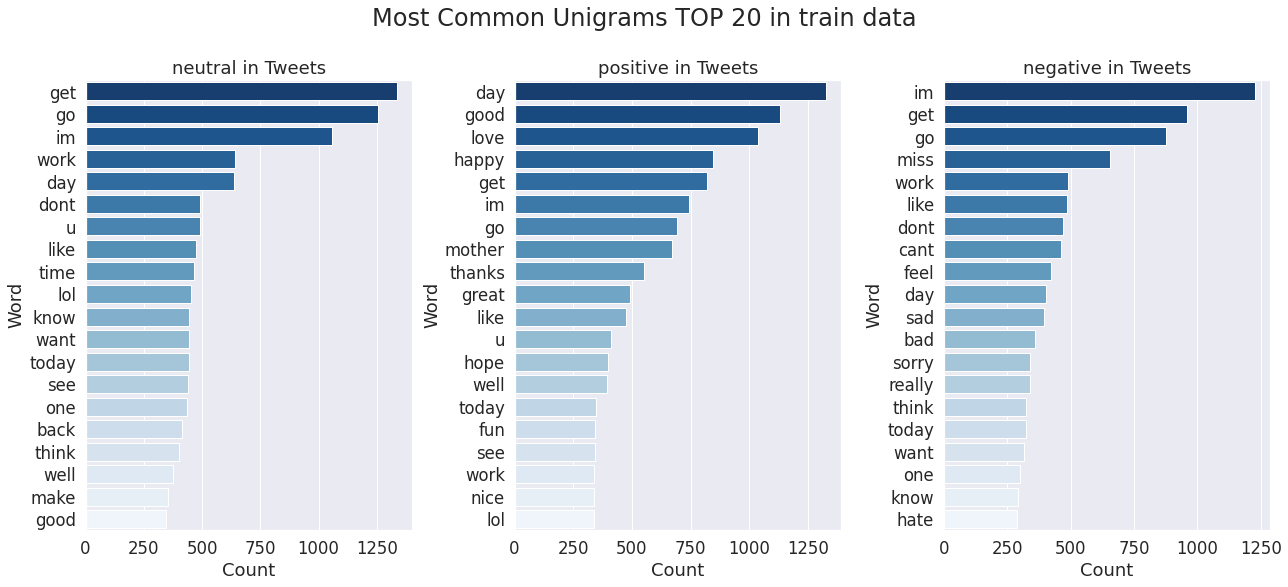

In [49]:
# Displaying most common words in train data.
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette= Blues_palette[::-1], ax=j)

axes[0].set_title('neutral in Tweets')
axes[1].set_title('positive in Tweets')
axes[2].set_title('negative in Tweets')

axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Word')

fig.suptitle('Most Common Unigrams TOP 20 in train data', fontsize=24, va='baseline')
plt.tight_layout()

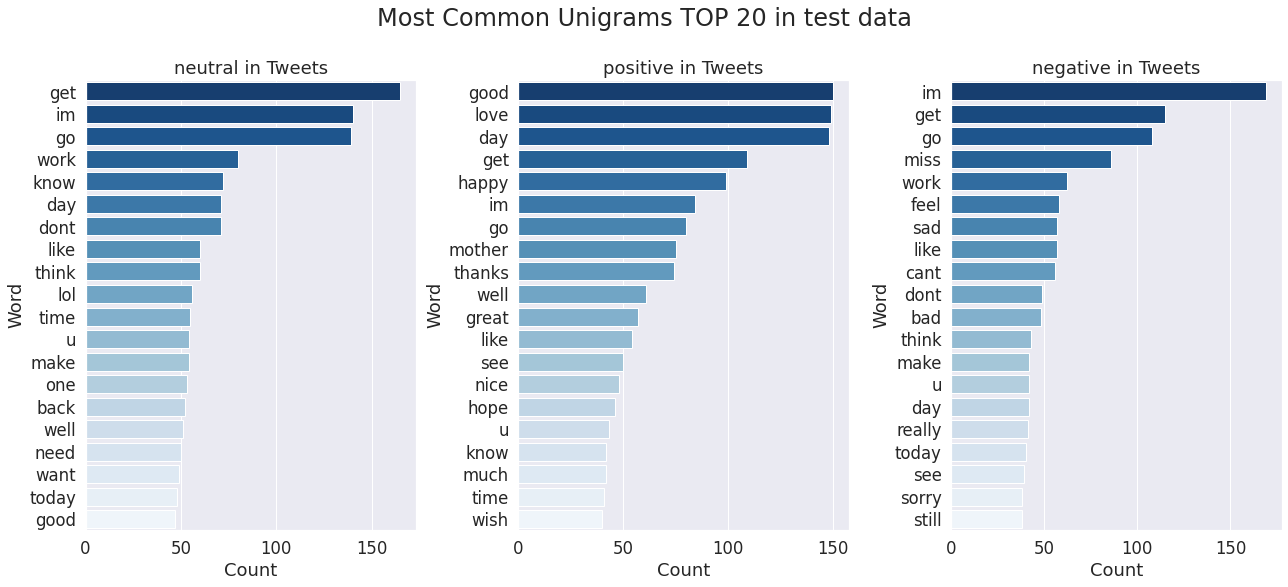

In [50]:
# Displaying most common words in test data
lis_test = [
    df_test[df_test['sentiment'] == 'neutral']['lemma_str_text'],
    df_test[df_test['sentiment'] == 'positive']['lemma_str_text'],
    df_test[df_test['sentiment'] == 'negative']['lemma_str_text']
]

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_test, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette= Blues_palette[::-1], ax=j)

axes[0].set_title('neutral in Tweets')
axes[1].set_title('positive in Tweets')
axes[2].set_title('negative in Tweets')

axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Word')

fig.suptitle('Most Common Unigrams TOP 20 in test data', fontsize=24, va='baseline')
plt.tight_layout()

## 20 Most Common Words

In [51]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette= Blues_palette[::-1], ax=j)
        axes[0].set_title('neutral in Tweets')
        axes[1].set_title('positive in Tweets')
        axes[2].set_title('negative in Tweets')
        
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        axes[2].set_xlabel('Count')
        axes[2].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()
        
def ngrams_test(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis_test, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette= Blues_palette[::-1], ax=j)
        axes[0].set_title('neutral in Tweets')
        axes[1].set_title('positive in Tweets')
        axes[2].set_title('negative in Tweets')
        
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        axes[2].set_xlabel('Count')
        axes[2].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

## Most Common Bigrams (N = 2)

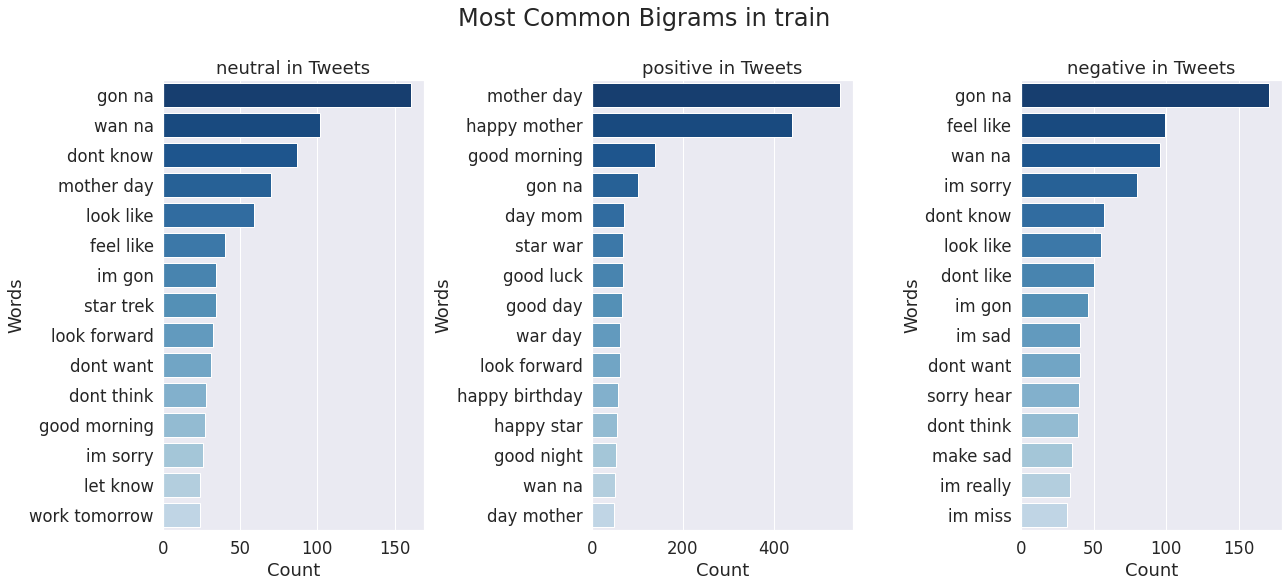

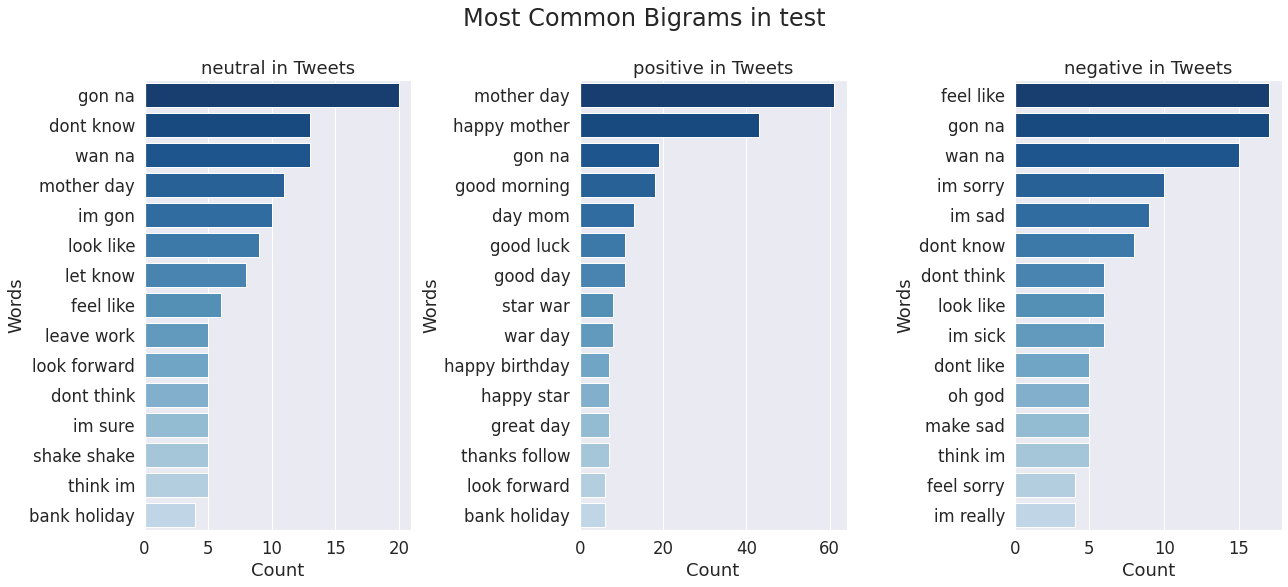

In [52]:
ngrams(2, 'Most Common Bigrams in train')
ngrams_test(2, 'Most Common Bigrams in test')

## Most Common Trigrams (N = 3)

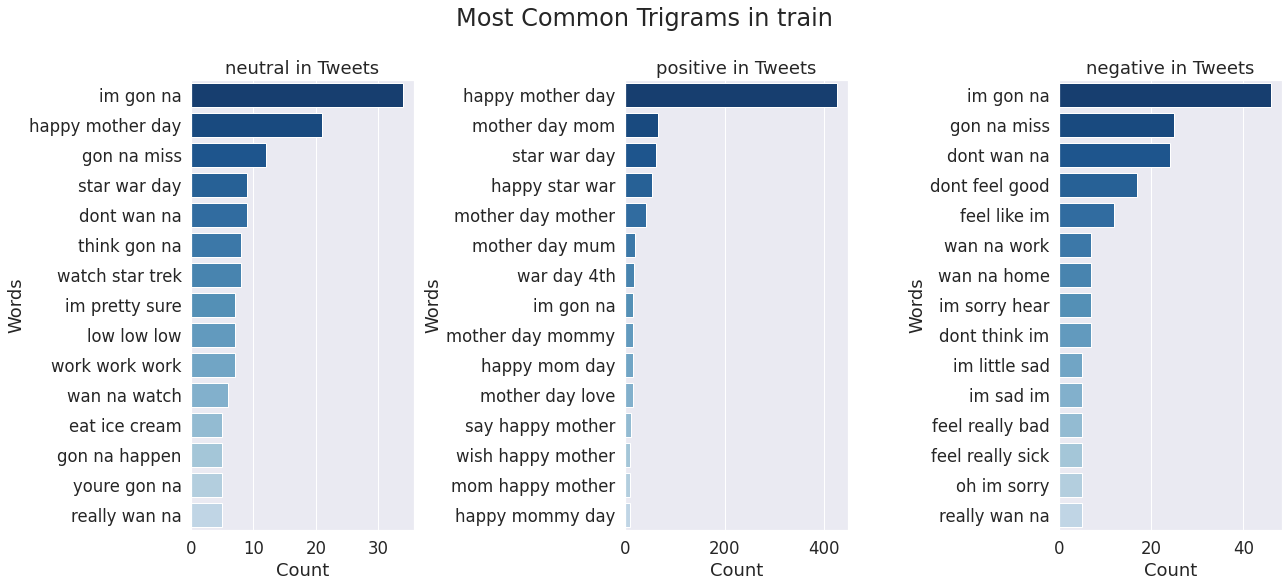

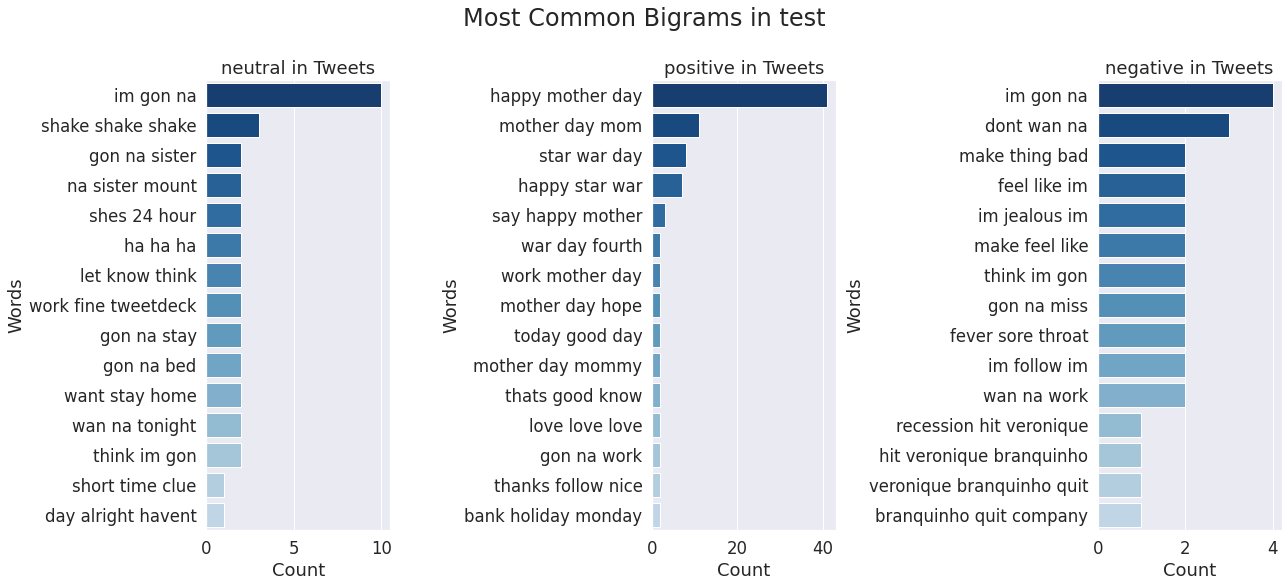

In [53]:
ngrams(3, 'Most Common Trigrams in train')
ngrams_test(3, 'Most Common Bigrams in test')

# 7. Word Clouds

In [54]:
mask = np.array(Image.open('../input/maskwordclud22/Mask-wordcloud/twitter_mask3.jpg'))

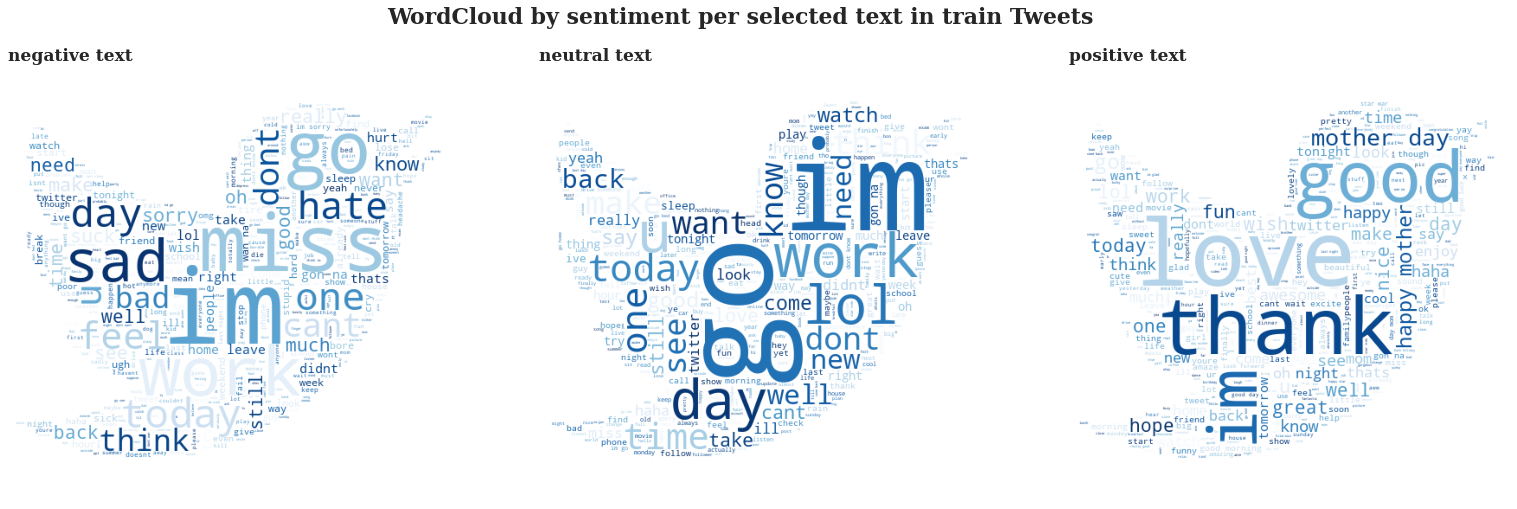

In [55]:
fig, axes = plt.subplots(1,3, figsize=(24,12))
sentiment_list = np.unique(df_train['sentiment'])

for i, sentiment in zip(range(3), sentiment_list):
    wc = WordCloud(background_color="white", max_words = 2000, width = 1600, height = 800, mask=mask, colormap="Blues").generate(" ".join(df_train[df_train['sentiment']==sentiment]['lemma_str_text']))
    
    axes[i].text(0.5,1, "{} text".format(sentiment), fontweight="bold", fontfamily='serif', fontsize=17)
    axes[i].patch.set_alpha(0)
    axes[i].axis('off')
    axes[i].imshow(wc)

fig.text(0.3,0.8,"WordCloud by sentiment per selected text in train Tweets", fontweight="bold", fontfamily='serif', fontsize=22)
plt.show()

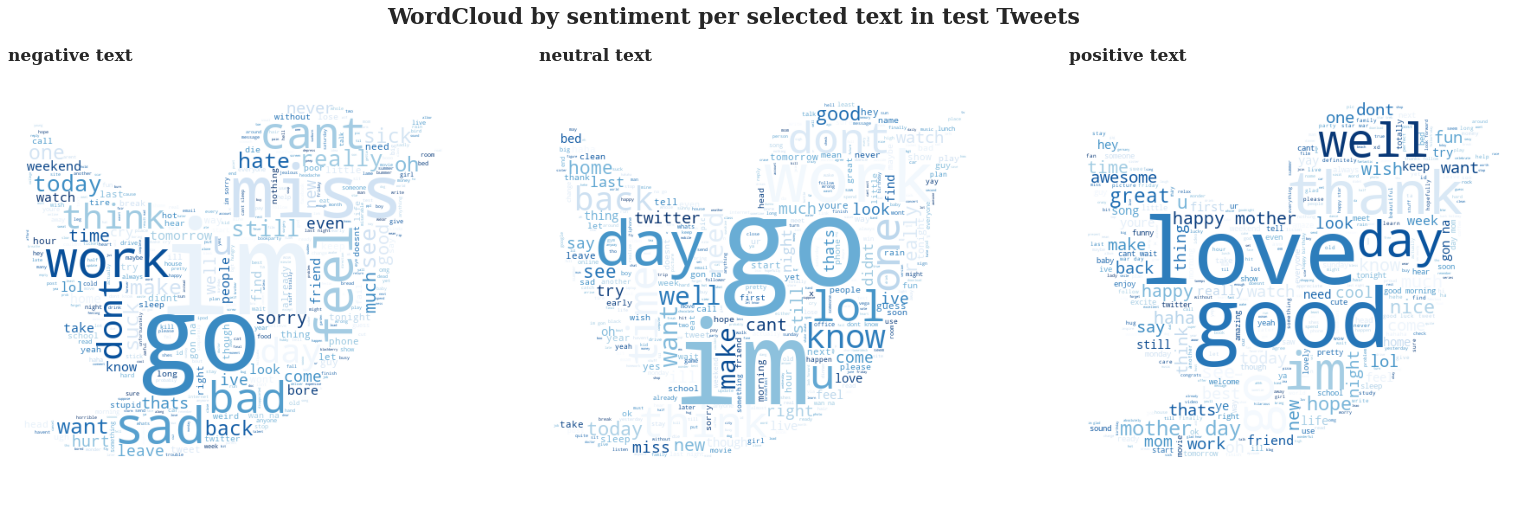

In [56]:
fig, axes = plt.subplots(1,3, figsize=(24,12))
sentiment_list = np.unique(df_test['sentiment'])

for i, sentiment in zip(range(3), sentiment_list):
    wc = WordCloud(background_color="white", max_words = 2000, width = 1600, height = 800, mask=mask, colormap="Blues").generate(" ".join(df_test[df_test['sentiment']==sentiment]['lemma_str_text']))
    
    axes[i].text(0.5,1, "{} text".format(sentiment), fontweight="bold", fontfamily='serif', fontsize=17)
    axes[i].patch.set_alpha(0)
    axes[i].axis('off')
    axes[i].imshow(wc)

fig.text(0.3,0.8,"WordCloud by sentiment per selected text in test Tweets", fontweight="bold", fontfamily='serif', fontsize=22)
plt.show()

# 8. Training RoBERTa

[RoBERTa](https://github.com/pytorch/fairseq/tree/master/examples/roberta) demonstrates that by rebuilding BERT, masked language model is capable of competing with autoregressive language modeling such as XLNet



12-layer, 768-hidden, 12-heads, 125M parameters. RoBERTa using the BERT-base architecture

<h3><b>Difference b/w BERT and RoBERTa</b></h3>

* Learning w/ longer, larger batch w/ more data

* Remove next sentence prediction objective

* Learning w/ longer sequences

* Change masking dynamically

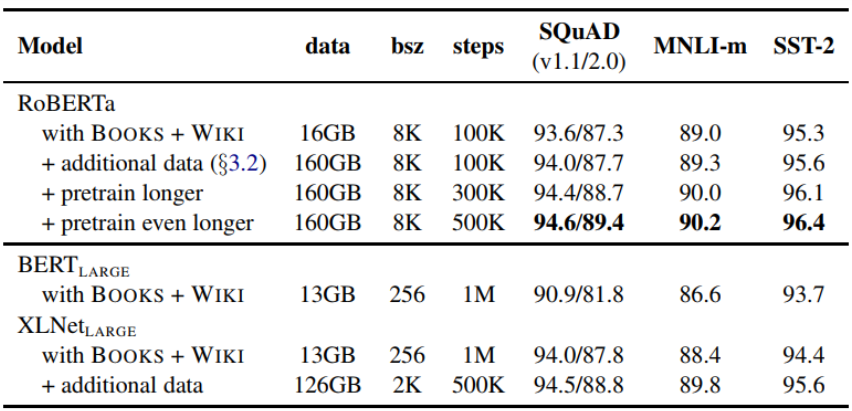

## Feature Selection

EDA helped, but using existing 'text', 'selected_text' and 'sentiment' to find output

In [57]:
# Train
train_df = df_train[['textID','text','selected_text','sentiment']]
train_df['text'] = train_df['text'].astype(str)
train_df['selected_text'] = train_df['selected_text'].astype(str)

# Test
test_df = df_test[['textID','text','sentiment']]
test_df['text'] = test_df['text'].astype(str)

In [58]:
display(train_df.sample(5))
display(test_df.sample(5))

,textID,text,selected_text,sentiment
6748,715d385efd,"Munch away, my dear Watson, Munch away","Munch away, my dear Watson, Munch away",neutral
10325,66adab7336,watching freo on a sunday arvo is a good hobby,good hobby,positive
22376,d38c6dfdcd,re: Edwards I hope so!,I hope so!,positive
590,3e4b3ec6a6,Unfortunately for us it looks like there are ...,Unfortunately,negative
20431,ff465a22d6,ouch. I hate it when that happens.,I hate it when that happens.,negative


,textID,text,sentiment
1780,35e15c616c,_Bloody_Poet What`s the matter?,neutral
3135,e33459f8f1,Just left Brooklyn going uptown for some latin...,neutral
2142,64b8d96644,I get the feeling is going to make me wait un...,neutral
2531,564d996422,hehe - about NZ being the most magical place ...,positive
1402,b56c29ed7d,Why am I always the one on time. They are alwa...,negative


## Seed Setting

In [59]:
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU
    device = torch.device('cuda')    

    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [60]:
def set_seed(seed):
    # Set random seed for reproducibility
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = True
        
seed = 777
set_seed(seed)

## Data Loader

In [61]:
MAX_LENGTH = 100
TRAIN_BATCH_SIZE = 32
TEST_BATCH_SIZE = 16
EPOCHS = 10

In [62]:
PATH = "../input/roberta-base"

tokenizer = ByteLevelBPETokenizer(
            vocab = f'{PATH}/vocab.json', 
            merges= f'{PATH}/merges.txt', 
            add_prefix_space = True,
            lowercase=True)

tokenizer.enable_truncation(max_length=512)

class TextDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        #data loading
        self.df = df
        self.selected_text = "selected_text" in df
        self.tokenizer = tokenizer
        self.max_length = MAX_LENGTH
        
    def __len__(self):
        #len(dataset) i.e., the total number of samples
        return len(self.df)
    
    def get_data(self, row):
        #processing the data
        text = " "+" ".join(row.text.lower().split()) # clean the text
        encoded_input = self.tokenizer.encode(text) # the sentence to be encoded
        
        sentiment_id = {
                'positive': 1313,
                'negative': 2430,
                'neutral': 7974
            }  # stating the ids of the sentiment values 
        
        #print ([list((i, encoded_input[i])) for i in range(len(encoded_input))])
        
        input_ids = [101] + [sentiment_id[row.sentiment]] + [102] + encoded_input.ids + [102]
                 
        #ID offsets       
        offsets = [(0, 0)] * 3 + encoded_input.offsets + [(0, 0)]  # since first 3 are [CLS] ...sentiment tokens... [SEP]
        
        
        pad_len = self.max_length - len(input_ids)    
        if pad_len > 0:
            input_ids += ([0] * pad_len)
            offsets += ([(0, 0)] * pad_len)
                       
        input_ids = torch.tensor(input_ids, dtype=torch.long)
        
        # The mask has 1 for real tokens and 0 for padding tokens. Only real tokens are attended to.
        masks = torch.where(input_ids != 0, torch.tensor(1), torch.tensor(0))  
        
        masks = torch.tensor(masks, dtype=torch.long)
        offsets = torch.tensor(offsets, dtype=torch.long)
                
        return input_ids, masks, text, offsets
    
    def get_target_ids(self, row, text, offsets):
        # preparing data only for the training
        selected_text = " " + " ".join(row.selected_text.lower().split())

        string_len = len(selected_text) - 1
        
        idx0 = None
        idx1 = None
            
        for ind in (position for position, line in enumerate(text) if line == selected_text[1]):
            if " " + text[ind: ind+string_len] == selected_text:
                idx0 = ind
                idx1 = ind + string_len - 1
                break
                
        char_targets = [0] * len(text)
        if idx0 != None and idx1 != None:
            for ct in range(idx0, idx1 + 1):
                char_targets[ct] = 1
                
        # Start and end tokens
        target_idx = []
        for k, (offset1, offset2) in enumerate(offsets):
            if sum(char_targets[offset1: offset2]) > 0:
                try:
                    target_idx.append(k)
                except:
                    continue

        targets_start = target_idx[0]
        targets_end = target_idx[-1]
                
        return selected_text, targets_start, targets_end
    
    def __getitem__(self, index): 
        # addressing each row by its index
        # dataset[index] i.e., generates one sample of data
        data = {}
        row = self.df.iloc[index]
        
        ids, masks, text, offsets = self.get_data(row)
        data['ids'] = ids
        data['masks'] = masks
        data['text'] = text
        data['offsets'] = offsets
        data['sentiment'] = row.sentiment
        
        if self.selected_text:   
            # checking if selected text exists
            # This part only exists in the training
            selected_text,start_index, end_index = self.get_target_ids(row, text, offsets)
            data['start_index'] = start_index
            data['end_index'] = end_index
            data['selected_text'] = selected_text
                
        return data

In [63]:
e = TextDataset(train_df, tokenizer, MAX_LENGTH)
e[1]

{'ids': tensor([  101,  2430,   102,    98,  3036,  5074,   939,    40,  2649,    47,
           259,    11, 15610,  1597,  2977, 16506,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'masks': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 

## Modeling

In [64]:
class TextModel(nn.Module):
    def __init__(self):
        super(TextModel, self).__init__()
        
        # RoBERTa encoder 
        config = RobertaConfig.from_pretrained(
            '../input/roberta-base/config.json', output_hidden_states=True)    
        self.roberta = RobertaModel.from_pretrained(
            '../input/roberta-base/pytorch_model.bin', config=config)

        for param in self.roberta.parameters():
            param.requires_grad = True
    
        self.drop0 = nn.Dropout(0.5)
        self.l0 = nn.Linear(config.hidden_size * 2,config.hidden_size) 
        # Multiplied by 2 since the forward pass concatenates the last two hidden representation layers
        
        self.drop1 = nn.Dropout(config.hidden_dropout_prob)
        self.l1 = nn.Linear(config.hidden_size, 2) 
        # The output will have two dimensions- start and end logits
        
        torch.nn.init.normal_(self.l0.weight, std=0.02)
        torch.nn.init.normal_(self.l0.bias, 0)
        
    def forward(self, ids, masks): 
        # token_type_ids
        # Return the hidden states from the RoBERTa backbone
        # Type: torch tensor
        last_hidden_state, pooled_output, hidden_states = self.roberta(input_ids=ids, attention_mask=masks, return_dict=False)
        
        # input_ids.shape and attention_mask.shape both will be of the size (batch size x seq length)
        # print(last_hidden_state.shape) : torch.Size([24, 100, 768])
        # But why 768? 
        # This is the number of hidden units in the feedforward-networks. We can verify that by checking the config.
        # Concatenate the last two hidden states
        out = torch.cat((hidden_states[-1], hidden_states[-2]), dim=-1)   
        # out = torch.mean(out, 0) # take the mean along axis 0
        
        # adding dropouts and linear layers
        out = self.drop0(out)
        out = F.relu(self.l0(out))
        out = self.drop1(out) 
        out = self.l1(out) 
        
        # splitting the tensor into two logits 
        start_logits, end_logits = out.split(1, dim=-1)
        
        # dimension along which to split the tensor.
        # Return a tensor with all the dimensions of input of size 1 removed, for both the logits.
        start_logits = start_logits.squeeze()  
        
        # Squeezing a tensor removes the dimensions or axes that have a length of one
        end_logits = end_logits.squeeze() 
        
        return start_logits, end_logits

# Training and validation dataloaders
def train_val_dataloaders(df, train_idx, val_idx, batch_size):
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    train_loader = torch.utils.data.DataLoader(
        TextDataset(train_df, tokenizer, MAX_LENGTH), 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=0,   # to avoid multi-process, keep it at 0
        drop_last=True)

    val_loader = torch.utils.data.DataLoader(
        TextDataset(val_df, tokenizer, MAX_LENGTH),
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0)

    dataloaders_dict = {"train": train_loader, "val": val_loader}

    return dataloaders_dict

# Test dataloader
def test_loader(df, batch_size=TEST_BATCH_SIZE):
    loader = torch.utils.data.DataLoader(
        TextDataset(test_df, tokenizer, MAX_LENGTH), 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0)    
    return loader

## Loss Function

In [65]:
def loss_function(start_logits, end_logits, start_positions, end_positions):
    ce_loss = nn.CrossEntropyLoss()
    start_loss = ce_loss(start_logits, start_positions)
    end_loss = ce_loss(end_logits, end_positions)    
    total_loss = start_loss + end_loss
    return total_loss

## Evaluation Function

In [66]:
def get_selected_text(text, start_idx, end_idx, offsets):
    selected_text = ""
    for ix in range(start_idx, end_idx + 1):
        selected_text += text[offsets[ix][0]: offsets[ix][1]]
        if (ix + 1) < len(offsets) and offsets[ix][1] < offsets[ix + 1][0]:
            selected_text += " "
    return selected_text

def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

def find_jaccard_score(text, selected_text, sentiment, offsets, start_logits, end_logits): #start_idx, end_idx
    start_pred = np.argmax(start_logits) # Predicted start index using argmax
    end_pred = np.argmax(end_logits) # Predicted end index using argmax
    if (end_pred <= start_pred) or sentiment == 'neutral' or len(text.split()) < 2:
        enc = tokenizer.encode(text)
        prediction = tokenizer.decode(enc.ids[start_pred-1:end_pred])   
    else:
        prediction = get_selected_text(text, start_pred, end_pred, offsets)
    true = selected_text
    
    return jaccard(true, prediction), prediction

## Training Function

In [67]:
train_loss = []
val_loss = []
jac_train = []
jac_val = []

def TrainModel(model, dataloaders_dict, optimizer, num_epochs, scheduler, device, filename): 
    # Set device as `cuda` (GPU)
    model.to(device)
    
    for epoch in range(num_epochs):
        for key in ['train', 'val']:
            if key == 'train':
                model.train()
                dataloaders = dataloaders_dict['train']
            else:
                model.eval()
                dataloaders = dataloaders_dict['val']

            epoch_loss = 0.0
            epoch_jaccard = 0.0
            
            # Set tqdm to add loading screen and set the length
            loader = tqdm(dataloaders, total=len(dataloaders))
            #print(len(dataloaders))
                        
            # loop over the data iterator, and feed the inputs to the network
            # Train the model on each batch
            for (idx, data) in enumerate(loader):
                ids = data['ids']
                masks = data['masks']
                text = data['text']
                offsets = data['offsets'].numpy()
                start_idx = data['start_index']
                end_idx = data['end_index']
                sentiment = data['sentiment']

                model.zero_grad()
                optimizer.zero_grad()
                
                ids = ids.to(device, dtype=torch.long)
                masks = masks.to(device, dtype=torch.long)
                start_idx = start_idx.to(device, dtype=torch.long)
                end_idx = end_idx.to(device, dtype=torch.long)

                with torch.set_grad_enabled(key == 'train'): 
                    start_logits, end_logits = model(ids, masks) 
                    
                    loss = loss_function(start_logits, end_logits, start_idx, end_idx)
                    
                    if key == 'train':
                        if idx != 0: 
                            loss.backward() # Perform a backward pass to calculate the gradients
                        optimizer.step() # Update parameters and take a step using the computed gradient
                        scheduler.step() # Update learning rate schedule                        
                        
                        # Clip the norm of the gradients to 1.0.
                        # This is to help prevent the "exploding gradients" problem.
                        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  
                        
                    epoch_loss += loss.item() * len(ids)
                    
                    # Move logits to CPU
                    # detaching these outputs so that the backward passes stop at this point
                    start_idx = start_idx.cpu().detach().numpy()
                    end_idx = end_idx.cpu().detach().numpy()
                    start_logits = torch.softmax(start_logits, dim=1).cpu().detach().numpy()
                    end_logits = torch.softmax(end_logits, dim=1).cpu().detach().numpy()
                    
                    selected_text = data['selected_text']
                    
                    filtered_sentences = []
                    for i, t_data in enumerate(text):                 
                        jaccard_score, filtered_output = find_jaccard_score(
                            t_data,
                            selected_text[i],
                            sentiment[i],
                            offsets[i],
                            start_logits[i], 
                            end_logits[i])
                        epoch_jaccard += jaccard_score
                        filtered_sentences.append(filtered_output)
            
            # Calculate the average loss over the training data
            epoch_loss = epoch_loss / len(dataloaders.dataset)
            # Calculate the average jaccard score over the training data
            epoch_jaccard = epoch_jaccard / len(dataloaders.dataset)
            
            print('Epoch {}/{} | {:^5} | Loss: {:.4f} | Jaccard: {:.4f}'.format(
                epoch + 1, num_epochs, key, epoch_loss, epoch_jaccard))
            
            # Store the loss value for plotting the learning curve.
            if key == 'train':
                train_loss.append(epoch_loss)
                jac_train.append(epoch_jaccard)
                
            else:
                val_loss.append(epoch_loss)
                jac_val.append(epoch_jaccard)
    
    torch.save(model.state_dict(), filename)

## Training

In [68]:
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=seed)

In [69]:
from transformers import logging
logging.set_verbosity_error()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

# jupyter-notebook --tweet-sentiment-extraction --NotebookApp.iopub_data_rate_limit=1.0e10 

In [70]:
for fold, (idxTrain, idxVal) in enumerate(skf.split(train_df, train_df.sentiment), start=1):
    print('#'*10)
    print('# FOLD %i #'%(fold))
    print('#'*10)
    
    model = TextModel()
    optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=0.01, correct_bias=False)
    dataloaders_dict = train_val_dataloaders(train_df, idxTrain, idxVal, batch_size=TRAIN_BATCH_SIZE)
    num_training_steps = int(len(train_df) / EPOCHS * TRAIN_BATCH_SIZE)
    
    # default #use a linear scheduler with no warmup steps
    scheduler = get_linear_schedule_with_warmup(
                  optimizer,
                  num_warmup_steps=0, 
                  num_training_steps=num_training_steps
                )    
    TrainModel(
        model, 
        dataloaders_dict, 
        optimizer, 
        EPOCHS,
        scheduler,
        device,
        f'bert_fold{fold}.pth')

##########
# FOLD 1 #
##########


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 1/10 | train | Loss: 2.2176 | Jaccard: 0.4874


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 1/10 |  val  | Loss: 1.6910 | Jaccard: 0.5180


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 2/10 | train | Loss: 1.7700 | Jaccard: 0.5032


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 2/10 |  val  | Loss: 1.6731 | Jaccard: 0.4997


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 3/10 | train | Loss: 1.5655 | Jaccard: 0.5190


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 3/10 |  val  | Loss: 1.6606 | Jaccard: 0.5150


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 4/10 | train | Loss: 1.4380 | Jaccard: 0.5271


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 4/10 |  val  | Loss: 1.7109 | Jaccard: 0.5189


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 5/10 | train | Loss: 1.3090 | Jaccard: 0.5400


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 5/10 |  val  | Loss: 1.7589 | Jaccard: 0.4983


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 6/10 | train | Loss: 1.1789 | Jaccard: 0.5570


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 6/10 |  val  | Loss: 1.9256 | Jaccard: 0.4988


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 7/10 | train | Loss: 1.0576 | Jaccard: 0.5702


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 7/10 |  val  | Loss: 1.9766 | Jaccard: 0.4960


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 8/10 | train | Loss: 0.9076 | Jaccard: 0.5886


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 8/10 |  val  | Loss: 2.3784 | Jaccard: 0.5212


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 9/10 | train | Loss: 0.7691 | Jaccard: 0.6080


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 9/10 |  val  | Loss: 2.3852 | Jaccard: 0.4945


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 10/10 | train | Loss: 0.6399 | Jaccard: 0.6210


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 10/10 |  val  | Loss: 2.6082 | Jaccard: 0.4994
##########
# FOLD 2 #
##########


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 1/10 | train | Loss: 8.9615 | Jaccard: 0.0801


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 1/10 |  val  | Loss: 9.2096 | Jaccard: 0.0045


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 2/10 | train | Loss: 4.8207 | Jaccard: 0.3239


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 2/10 |  val  | Loss: 2.0319 | Jaccard: 0.5344


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 3/10 | train | Loss: 1.9531 | Jaccard: 0.4948


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 3/10 |  val  | Loss: 1.8297 | Jaccard: 0.4955


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 4/10 | train | Loss: 1.7007 | Jaccard: 0.5051


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 4/10 |  val  | Loss: 1.7771 | Jaccard: 0.4674


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 5/10 | train | Loss: 1.5424 | Jaccard: 0.5192


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 5/10 |  val  | Loss: 1.7920 | Jaccard: 0.4686


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 6/10 | train | Loss: 1.3872 | Jaccard: 0.5334


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 6/10 |  val  | Loss: 1.8336 | Jaccard: 0.5234


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 7/10 | train | Loss: 1.2231 | Jaccard: 0.5529


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 7/10 |  val  | Loss: 1.9121 | Jaccard: 0.5063


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 8/10 | train | Loss: 1.0658 | Jaccard: 0.5684


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 8/10 |  val  | Loss: 2.2661 | Jaccard: 0.4962


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 9/10 | train | Loss: 0.9134 | Jaccard: 0.5850


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 9/10 |  val  | Loss: 2.2196 | Jaccard: 0.5106


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 10/10 | train | Loss: 0.7796 | Jaccard: 0.6038


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 10/10 |  val  | Loss: 2.5691 | Jaccard: 0.4862
##########
# FOLD 3 #
##########


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 1/10 | train | Loss: 2.1211 | Jaccard: 0.4851


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 1/10 |  val  | Loss: 1.6786 | Jaccard: 0.4829


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 2/10 | train | Loss: 1.5944 | Jaccard: 0.5109


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 2/10 |  val  | Loss: 1.6466 | Jaccard: 0.4848


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 3/10 | train | Loss: 1.4375 | Jaccard: 0.5264


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 3/10 |  val  | Loss: 1.6712 | Jaccard: 0.4707


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 4/10 | train | Loss: 1.2427 | Jaccard: 0.5404


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 4/10 |  val  | Loss: 1.8897 | Jaccard: 0.5185


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 5/10 | train | Loss: 1.0830 | Jaccard: 0.5600


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 5/10 |  val  | Loss: 2.0278 | Jaccard: 0.4942


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 6/10 | train | Loss: 0.9209 | Jaccard: 0.5823


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 6/10 |  val  | Loss: 2.0816 | Jaccard: 0.5061


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 7/10 | train | Loss: 0.7662 | Jaccard: 0.5997


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 7/10 |  val  | Loss: 2.5070 | Jaccard: 0.5143


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 8/10 | train | Loss: 0.6295 | Jaccard: 0.6172


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 8/10 |  val  | Loss: 2.5533 | Jaccard: 0.5109


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 9/10 | train | Loss: 0.5352 | Jaccard: 0.6310


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 9/10 |  val  | Loss: 3.0186 | Jaccard: 0.5256


  0%|          | 0/572 [00:00<?, ?it/s]

Epoch 10/10 | train | Loss: 0.4208 | Jaccard: 0.6434


  0%|          | 0/287 [00:00<?, ?it/s]

Epoch 10/10 |  val  | Loss: 3.4208 | Jaccard: 0.5205


## Inference

In [71]:
%%time

t_loader = test_loader(test_df)
predictions = []
models = []
for fold in range(skf.n_splits):
    model = TextModel()
    model.to(device)
    model.load_state_dict(torch.load(f'./bert_fold{fold+1}.pth'))
    model.eval()
    models.append(model)

loader = tqdm(t_loader, total=len(t_loader))
for (idx, data) in enumerate(loader):
    ids = data['ids'].to(device)
    masks = data['masks'].to(device)
    text = data['text']
    offsets = data['offsets'].numpy()

    start_logits = []
    end_logits = []
    for model in models:
        with torch.no_grad():
            output = model(ids, masks)
            start_logits.append(torch.softmax(output[0], dim=1).cpu().detach().numpy())
            end_logits.append(torch.softmax(output[1], dim=1).cpu().detach().numpy())

    start_logits = np.mean(start_logits, axis=0)
    end_logits = np.mean(end_logits, axis=0)
    
    for i, t_data in enumerate(text):
        start_pred = np.argmax(start_logits[i])
        end_pred = np.argmax(end_logits[i])
        if start_pred >= end_pred:
            enc = tokenizer.encode(t_data)
            prediction = tokenizer.decode(enc.ids[start_pred-1:end_pred])
        else:
            prediction = get_selected_text(t_data, start_pred, end_pred, offsets[i])
        predictions.append(prediction)

  0%|          | 0/221 [00:00<?, ?it/s]

CPU times: user 39 s, sys: 1.51 s, total: 40.5 s
Wall time: 41 s


# 9. Submission

In [72]:
sub_df = pd.read_csv('../input/tweet-sentiment-extraction/sample_submission.csv')
sub_df['selected_text'] = predictions

# post-processing trick
sub_df['selected_text'] = sub_df['selected_text'].apply(lambda x: x.replace('!!!!', '!') if len(x.split())==1 else x)
sub_df['selected_text'] = sub_df['selected_text'].apply(lambda x: x.replace('..', '.') if len(x.split())==1 else x)
sub_df['selected_text'] = sub_df['selected_text'].apply(lambda x: x.replace('...', '.') if len(x.split())==1 else x)
sub_df[['textID','selected_text']].to_csv('submission.csv',index=False)
pd.set_option('max_colwidth', 60)

sub_df.sample(10)

,textID,selected_text
1988,faee4563bd,snowbear has finally come out...congrats
1085,0144252776,"and, yes. i <3 mac, if only it weren`t so expensive"
424,0693a85163,this should be boring.
1815,59ee5ff2f9,of
432,d7746b6b68,is listening to p!nk tunage and trying to teach my cat ...
2963,08ad89c6b0,yayy.
2437,a1b12787c2,rare treat
980,67cafda653,i am public and can`t get anyone to follow me
3012,9f89432794,missing my big girl.
712,c9e5ca399a,i miss you.


# References

* https://www.kaggle.com/abhishek/roberta-inference-5-folds/data

* https://www.kaggle.com/shoheiazuma/tweet-sentiment-roberta-pytorch

* https://www.kaggle.com/aditidutta/tweet-sentiment-extraction-pytorch

* https://brunch.co.kr/@choseunghyek/7

* https://vanche.github.io/spanbert_roberta/